# Student GPA preditcor

Our Project deals with prediction of GPA 

# Environments setup and Data Source Acquisition

## Libraries and Datasets

Below We are importing necessary libraries like Pandas,numpy,seaborn,matplotlib as well as out datasets.
We are also merging two similiar attribute dataset(same datefields).

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')
datafile1=pd.read_csv(r"C:\Users\NAMAN GUPTA\Desktop\DS Project\data\portPP.csv")
datafile2=pd.read_csv(r"C:\Users\NAMAN GUPTA\Desktop\DS Project\data\matPP.csv")
datafile3=pd.read_csv(r"C:\Users\NAMAN GUPTA\Desktop\DS Project\data\students_dataset.csv")

# Data Cleaning and Wrangling

## Joining all the required data

We have three datasets of which 2 have same attributes(datafields) and one has very different attributes(datafields) than the other two.

In [2]:
merged_dataset=pd.concat([datafile1,datafile2])
merged_dataset.drop("Unnamed: 0",axis=1,inplace=True)
datafile3['freetime']=datafile3.apply(lambda x:x['Watching_TV_Hours']+x['Computer_Use_Hours'],axis=1)
datafile3.rename(columns={"math score":"G1","reading score":"G2","writing score":"G3","Ageyears":"age","Travel_time_to_School":"traveltime",
                         "Outdoor_Activities_Hours":"goout","Work_At_Home_Hours":"studytime","Gender":"sex"},inplace = True)

As we can see here is that from the two datasets having very different datafields.So from the above two datasets, we are going to combine both of them appropriately to form a single merged dataset with most of the necessary attributes from either one of them
We have decided the following data attributes to be part of dataset,- G1,G2,G3,Age,traveltime,Pedu,Medu,studytime,outdoor activities,freetime(computer_use_hours+watching_tv_hours),studytme and ofcourse lettergrade.

In [3]:
merged_dataset

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,guardian_father,guardian_mother,guardian_other
0,0,0,18,1,0,0,4,4.0,2.0,2.0,...,0,0,0,0,0,0,1,0,1,0
1,0,0,17,1,0,1,1,1.0,1.0,2.0,...,0,0,0,0,1,0,0,1,0,0
2,0,0,15,1,1,1,1,1.0,1.0,2.0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,15,1,0,1,4,2.0,1.0,3.0,...,0,0,0,0,0,1,0,0,1,0
4,0,0,16,1,0,1,3,3.0,1.0,2.0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,20,1,1,0,2,2.0,1.0,2.0,...,1,0,0,0,0,1,0,0,0,1
391,1,1,17,1,1,1,3,1.0,2.0,1.0,...,1,0,0,0,0,1,0,0,1,0
392,1,1,21,0,0,1,1,1.0,1.0,1.0,...,0,0,0,0,1,0,0,0,0,1
393,1,1,18,0,1,1,3,2.0,3.0,1.0,...,1,0,0,0,1,0,0,0,1,0


In [4]:
merged_dataset.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3', 'letter_grade', 'reason_course', 'reason_home', 'reason_other',
       'reason_reputation', 'Mjob_at_home', 'Mjob_health', 'Mjob_other',
       'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health',
       'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'guardian_father',
       'guardian_mother', 'guardian_other'],
      dtype='object')

In [5]:
datafile3

,Region,ClassGrade,letter_grade,sex,age,Height_cm,Travel_to_School,traveltime,Favourite_physical_activity,Allergies,...,goout,Computer_Use_Hours,Watching_TV_Hours,studytime,Medu,Fedu,G1,G2,G3,freetime
0,WI,12,A,Male,17.0,193,Car,15.0,Other,Yes,...,10.0,3.0,5.0,2.0,3,3,13.4,13.4,12.6,8.0
1,WI,8,B,Male,14.0,174,Bicycle,8.0,Baseball/Softball,Yes,...,12.0,4.0,6.0,3.0,3,2,8.0,11.8,11.0,10.0
2,CA,12,A,Male,17.0,62,Car,8.0,Soccer,No,...,15.0,3.0,0.0,20.0,4,4,11.8,12.0,10.0,3.0
3,IN,12,A,Male,17.0,179,Bus,20.0,Athletics,No,...,1.0,3.0,2.0,5.0,2,3,15.4,15.6,13.6,5.0
4,MO,11,A,Male,16.0,180,Car,25.0,Soccer,No,...,1.0,3.0,0.0,0.0,1,2,15.6,14.6,13.6,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,MD,6,C,Female,12.0,145,Bus,15.0,Dancing,Yes,...,14.0,9.0,4.0,3.0,2,3,15.6,13.0,12.0,13.0
496,OH,12,A,Male,17.0,183,Car,15.0,Table Tennis,No,...,0.0,56.0,0.0,15.0,3,1,5.2,6.8,5.6,56.0
497,MI,11,A,Female,16.0,169,Car,5.0,Rowing,Yes,...,5.0,15.0,20.0,10.0,1,1,14.2,12.8,13.2,35.0
498,TX,12,A,Male,17.0,162,Car,35.0,Running/Jogging,Yes,...,2.0,25.0,1.0,10.0,2,2,17.2,18.4,18.6,26.0


In [6]:
datafile3.columns

Index(['Region', 'ClassGrade', 'letter_grade', 'sex', 'age', 'Height_cm',
       'Travel_to_School', 'traveltime', 'Favourite_physical_activity',
       'Allergies', 'Vegetarian', 'Favorite_School_Subject',
       'Sleep_Hours_Schoolnight', 'Sleep_Hours_Non_Schoolnight', 'goout',
       'Computer_Use_Hours', 'Watching_TV_Hours', 'studytime', 'Medu', 'Fedu',
       'G1', 'G2', 'G3', 'freetime'],
      dtype='object')

In [7]:
merged_dataset.drop(merged_dataset.columns.difference(['sex', 'age','Medu', 'Fedu','traveltime', 'studytime','freetime', 'goout','G1', 'G2',
       'G3', 'letter_grade']), 1, inplace=True)

merged_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044 entries, 0 to 394
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sex           1044 non-null   int64  
 1   age           1044 non-null   int64  
 2   Medu          1044 non-null   int64  
 3   Fedu          1044 non-null   float64
 4   traveltime    1044 non-null   float64
 5   studytime     1044 non-null   float64
 6   freetime      1044 non-null   float64
 7   goout         1044 non-null   int64  
 8   G1            1044 non-null   int64  
 9   G2            1044 non-null   int64  
 10  G3            1044 non-null   int64  
 11  letter_grade  1044 non-null   object 
dtypes: float64(4), int64(7), object(1)
memory usage: 106.0+ KB


In [8]:
datafile3.drop(datafile3.columns.difference(['sex', 'age','Medu', 'Fedu','traveltime', 'studytime','freetime', 'goout','G1', 'G2','G3','letter_grade']), 1, inplace=True)
datafile3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   letter_grade  500 non-null    object 
 1   sex           497 non-null    object 
 2   age           495 non-null    float64
 3   traveltime    480 non-null    float64
 4   goout         430 non-null    float64
 5   studytime     423 non-null    float64
 6   Medu          500 non-null    int64  
 7   Fedu          500 non-null    int64  
 8   G1            500 non-null    float64
 9   G2            500 non-null    float64
 10  G3            500 non-null    float64
 11  freetime      426 non-null    float64
dtypes: float64(8), int64(2), object(2)
memory usage: 47.0+ KB


As we can observe these 12 categories would be acting as the 'External Factors' affecrting the letter_grade for a student

In [9]:
findf=pd.concat([merged_dataset,datafile3])
findf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1544 entries, 0 to 499
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sex           1541 non-null   object 
 1   age           1539 non-null   float64
 2   Medu          1544 non-null   int64  
 3   Fedu          1544 non-null   float64
 4   traveltime    1524 non-null   float64
 5   studytime     1467 non-null   float64
 6   freetime      1470 non-null   float64
 7   goout         1474 non-null   float64
 8   G1            1544 non-null   float64
 9   G2            1544 non-null   float64
 10  G3            1544 non-null   float64
 11  letter_grade  1544 non-null   object 
dtypes: float64(9), int64(1), object(2)
memory usage: 156.8+ KB


## Reformatting data types
### 0-1 Transformation
We have to convert any object datatype to int or float for further calcutions. Only letter_grade would remain as object_type because we have to predict it. Remaining datafields like sex would be converted to int for making more sense

0-1 Transformation is the method of converting binary Qualitative data into 0 and 1 arbritraily so that we can use that in our calculations


In [10]:
print(findf.sex)

0           0
1           0
2           0
3           0
4           0
        ...  
495    Female
496      Male
497    Female
498      Male
499    Female
Name: sex, Length: 1544, dtype: object


In [11]:
findf['sex']=findf['sex'].replace({'Male':0,'Female':1})

In [12]:
findf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1544 entries, 0 to 499
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sex           1541 non-null   float64
 1   age           1539 non-null   float64
 2   Medu          1544 non-null   int64  
 3   Fedu          1544 non-null   float64
 4   traveltime    1524 non-null   float64
 5   studytime     1467 non-null   float64
 6   freetime      1470 non-null   float64
 7   goout         1474 non-null   float64
 8   G1            1544 non-null   float64
 9   G2            1544 non-null   float64
 10  G3            1544 non-null   float64
 11  letter_grade  1544 non-null   object 
dtypes: float64(10), int64(1), object(1)
memory usage: 156.8+ KB


## Null Values 

In [13]:
findf.isnull().values.any()

True

In [14]:
findf.isnull().values.sum()

249

In [15]:
findf[findf.isnull().any(axis=1)]

,sex,age,Medu,Fedu,traveltime,studytime,freetime,goout,G1,G2,G3,letter_grade
6,1.0,17.0,2,2.0,15.0,14.0,140.0,NaN,12.4,11.8,12.6,A
8,1.0,11.0,2,1.0,30.0,NaN,NaN,NaN,12.6,11.2,13.0,C
27,0.0,16.0,4,3.0,5.0,NaN,NaN,NaN,14.2,13.6,12.0,A
38,1.0,11.0,2,3.0,NaN,NaN,NaN,NaN,11.6,13.6,14.6,D
43,0.0,16.0,2,4.0,NaN,NaN,NaN,NaN,11.6,14.0,14.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...
461,0.0,18.0,4,4.0,2.0,NaN,NaN,NaN,9.8,8.8,8.2,A
471,1.0,17.0,4,4.0,20.0,NaN,NaN,NaN,16.0,17.4,15.8,A
476,1.0,14.0,2,3.0,NaN,NaN,NaN,NaN,16.0,17.0,15.6,B
478,1.0,10.0,3,2.0,10.0,NaN,NaN,NaN,13.6,14.6,13.6,D


We have null values. Now we have probably few ways to deal with these null values.
There could be many ways but can be broadly classified into two major types:

1. Deleting the Missing Values
2. Imputing the Missing Values
    1. Mean/medain/Mode Imputation
    2. Arbritrary Value Imputation
    3. Deductive Imputation
    4. hot-deck imputation
    5. Model-Based Imputation
    6. Regression Imputation
    7. Pattern Submodel Approach
    

Here we will not be deleting any missing value because Imputation of data is better than actually reducing the data. Most of missing values have their three or four datafields missing{MISSING AT RANDOM} which does not make it the whole data redunctant. Hence we will be going for Imputation method.

We will not be applying Mean imputation because we have not yet dealt with Outlier data which could highly affect the mean value, and arbritrary imputation is less logical in comparision to other methods given.
Hot-deck/Deductive/Regression Imputation/Pattern Submodel/Model-based are coding intensive and are hence discarded.
Our only options hence be Mean/Median/Mode. We have not yet dealt with outliers, hence mean could have very different values, hence mean is not considered. Median/Mode are left.
Median imputation is preferred when the distribution is skewed, as the median is less sensitive to outliers than the mean.
Mode imputation is suitable for categorical variables or numerical variables with a small number of unique values.

Hence we will be looking at skewness of the data here


In [16]:
skewvalue=pd.DataFrame(data=findf).skew(axis=0)
skewvalue

sex            0.183948
age            1.334425
Medu          -0.220944
Fedu           0.064838
traveltime     5.548621
studytime     11.052032
freetime       5.781897
goout         10.799670
G1             0.025583
G2            -0.440861
G3            -0.894844
dtype: float64

Here we can observe that age,traveltime/studytime/freetime/goout have high skewness . Becuase of that, we are going with Median imputation


### Median imputation

In [17]:
findf=findf.fillna(findf.median())

In [18]:
findf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1544 entries, 0 to 499
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sex           1544 non-null   float64
 1   age           1544 non-null   float64
 2   Medu          1544 non-null   int64  
 3   Fedu          1544 non-null   float64
 4   traveltime    1544 non-null   float64
 5   studytime     1544 non-null   float64
 6   freetime      1544 non-null   float64
 7   goout         1544 non-null   float64
 8   G1            1544 non-null   float64
 9   G2            1544 non-null   float64
 10  G3            1544 non-null   float64
 11  letter_grade  1544 non-null   object 
dtypes: float64(10), int64(1), object(1)
memory usage: 156.8+ KB


In [19]:
findf.isnull().values.any()

False

## Filtering out Outliers

An outlier is an observation that lies an abnormal distance from other values in a random sample from a population. In a sense, this definition leaves it up to the analyst (or a consensus process) to decide what will be considered abnormal.

We can detect/handling outliers through 2 major detections:
1. IQR Method
2. Z-Score

We will be applying all three methods one by one effectively analyse our outlier data

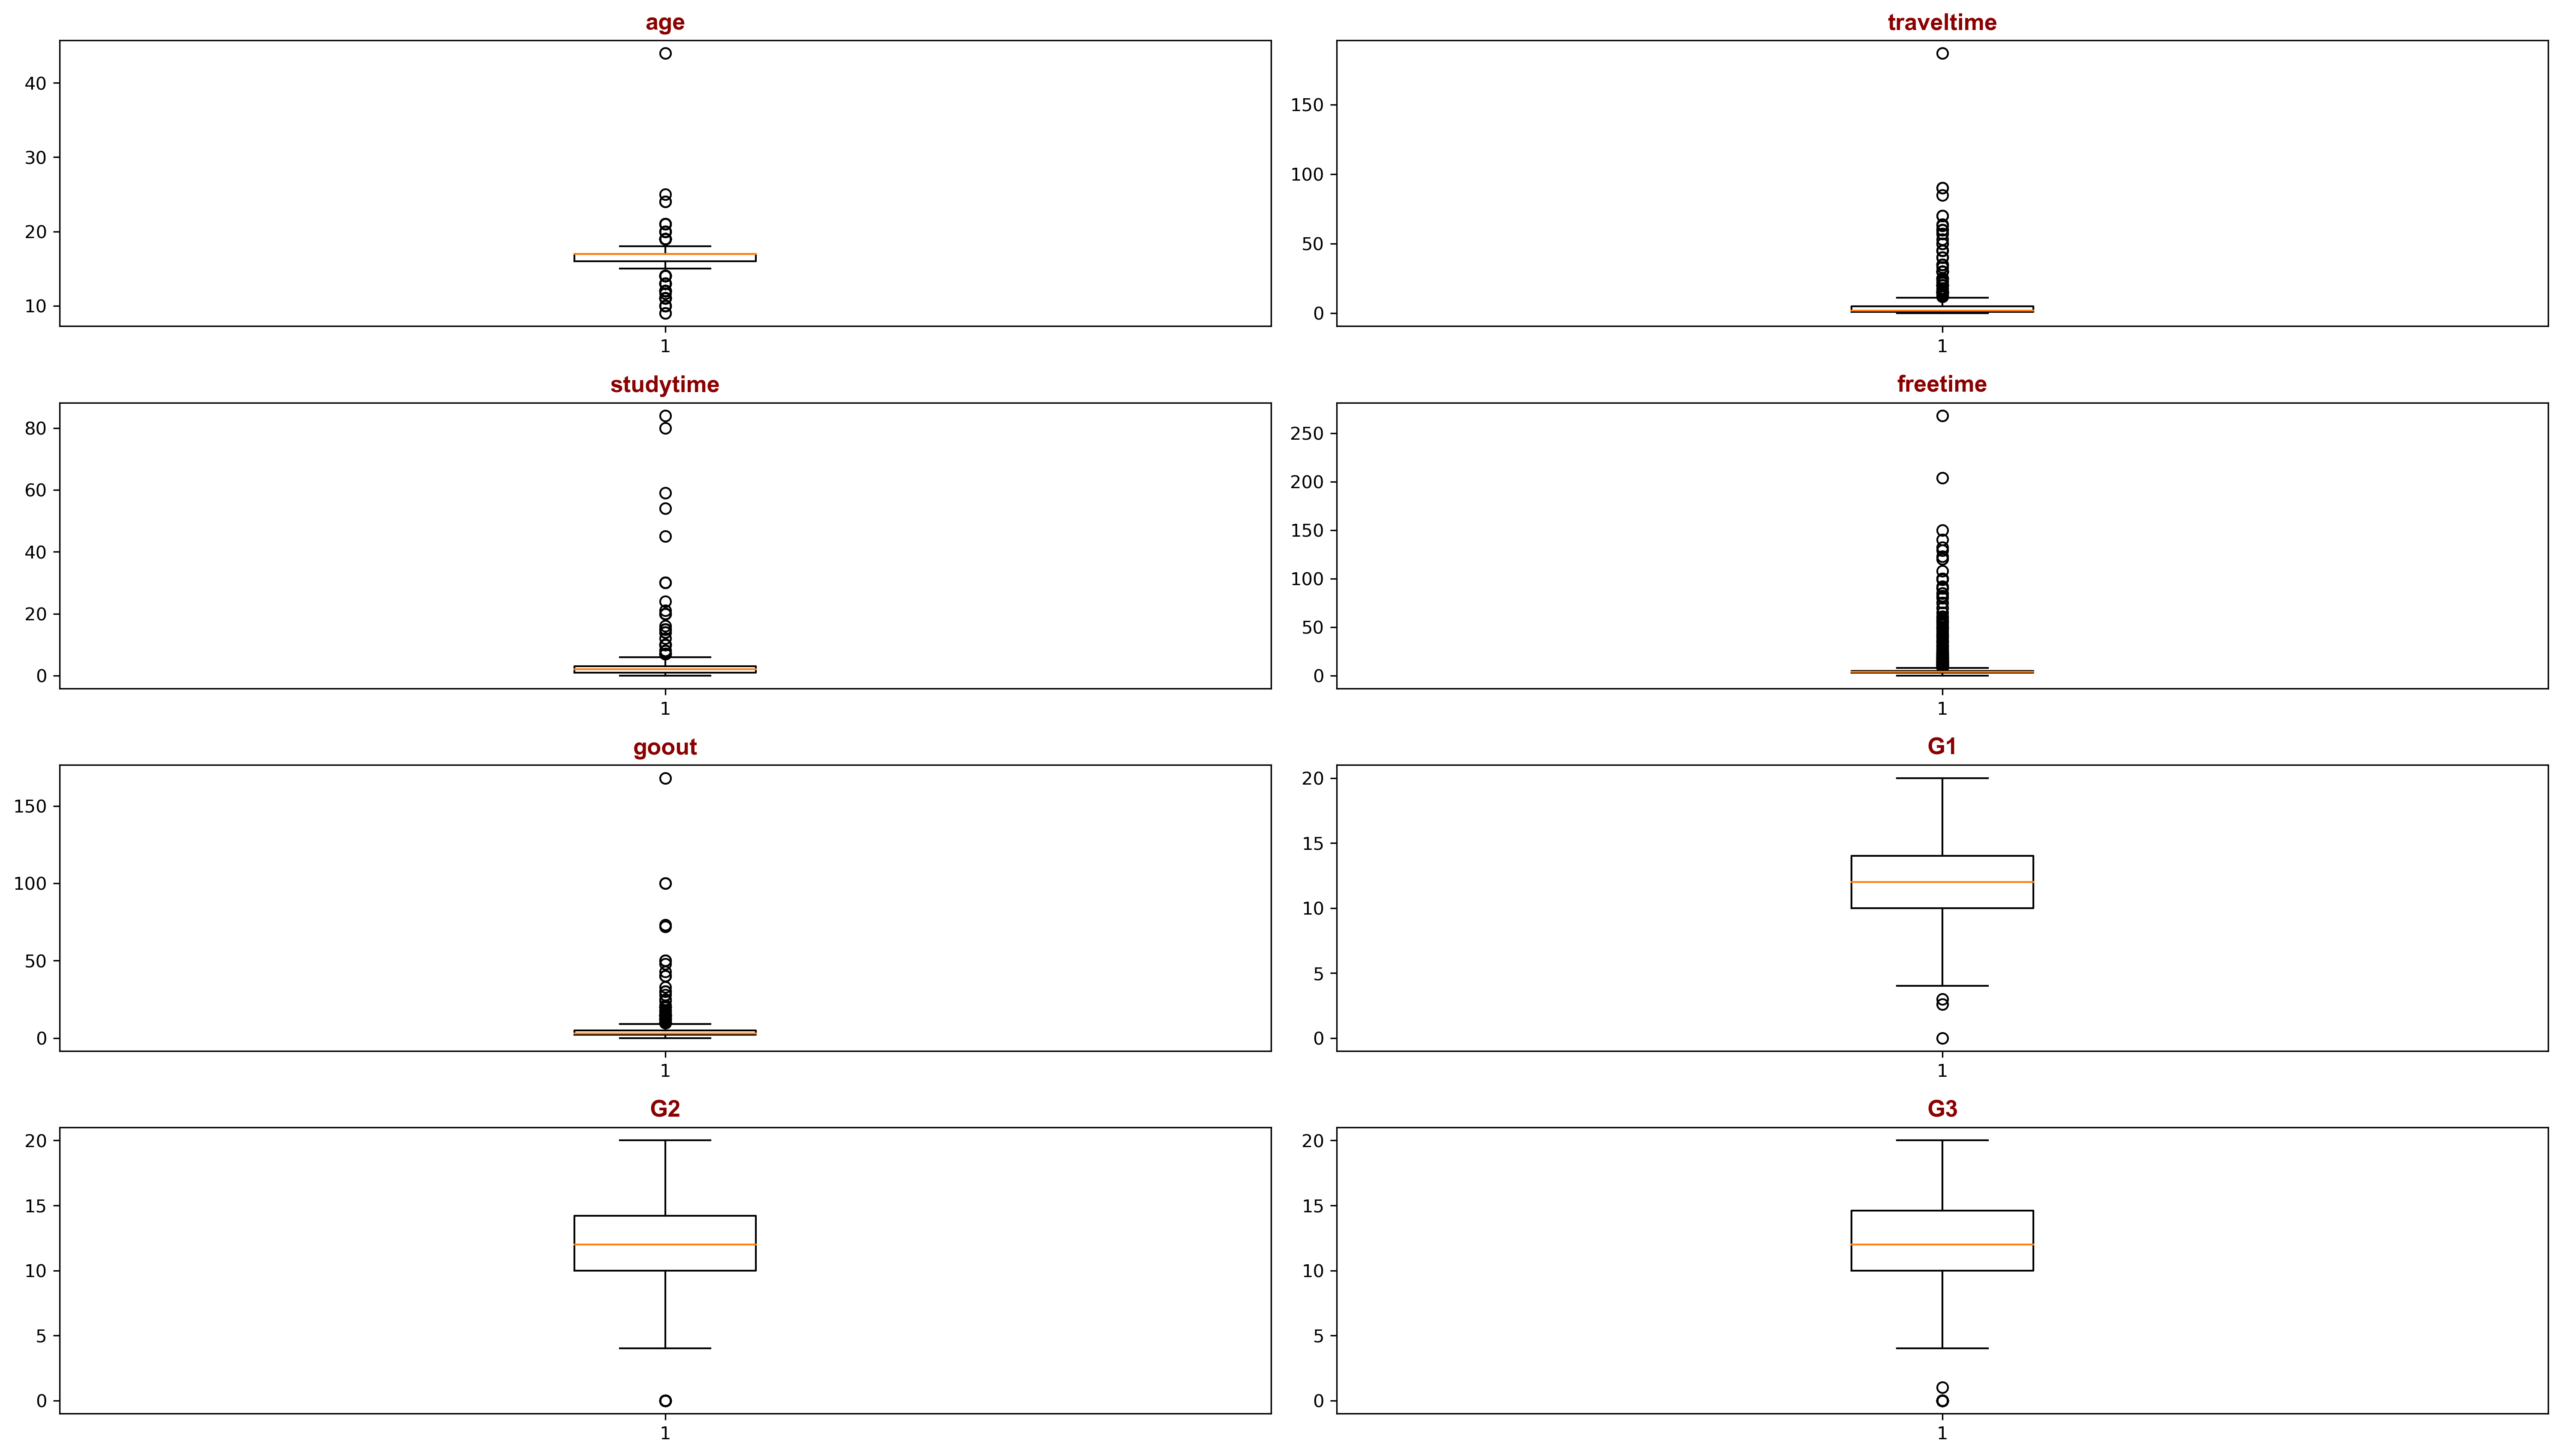

In [20]:
import matplotlib.pyplot as plt
baslik_font={'family':'arial','color':'darkred','weight':'bold','size':13}
eksen_font={'family':'arial','color':'darkblue','weight':'bold','size':10}
plt.figure(figsize=(20,14),dpi=300)
fill_list=['age','traveltime','studytime','freetime','goout','G1','G2','G3']
for i,col in enumerate(fill_list):
    plt.subplot(5,2,i+1)
    plt.boxplot(col, data=findf)
    plt.title(col,fontdict=baslik_font)
plt.tight_layout()
plt.show()

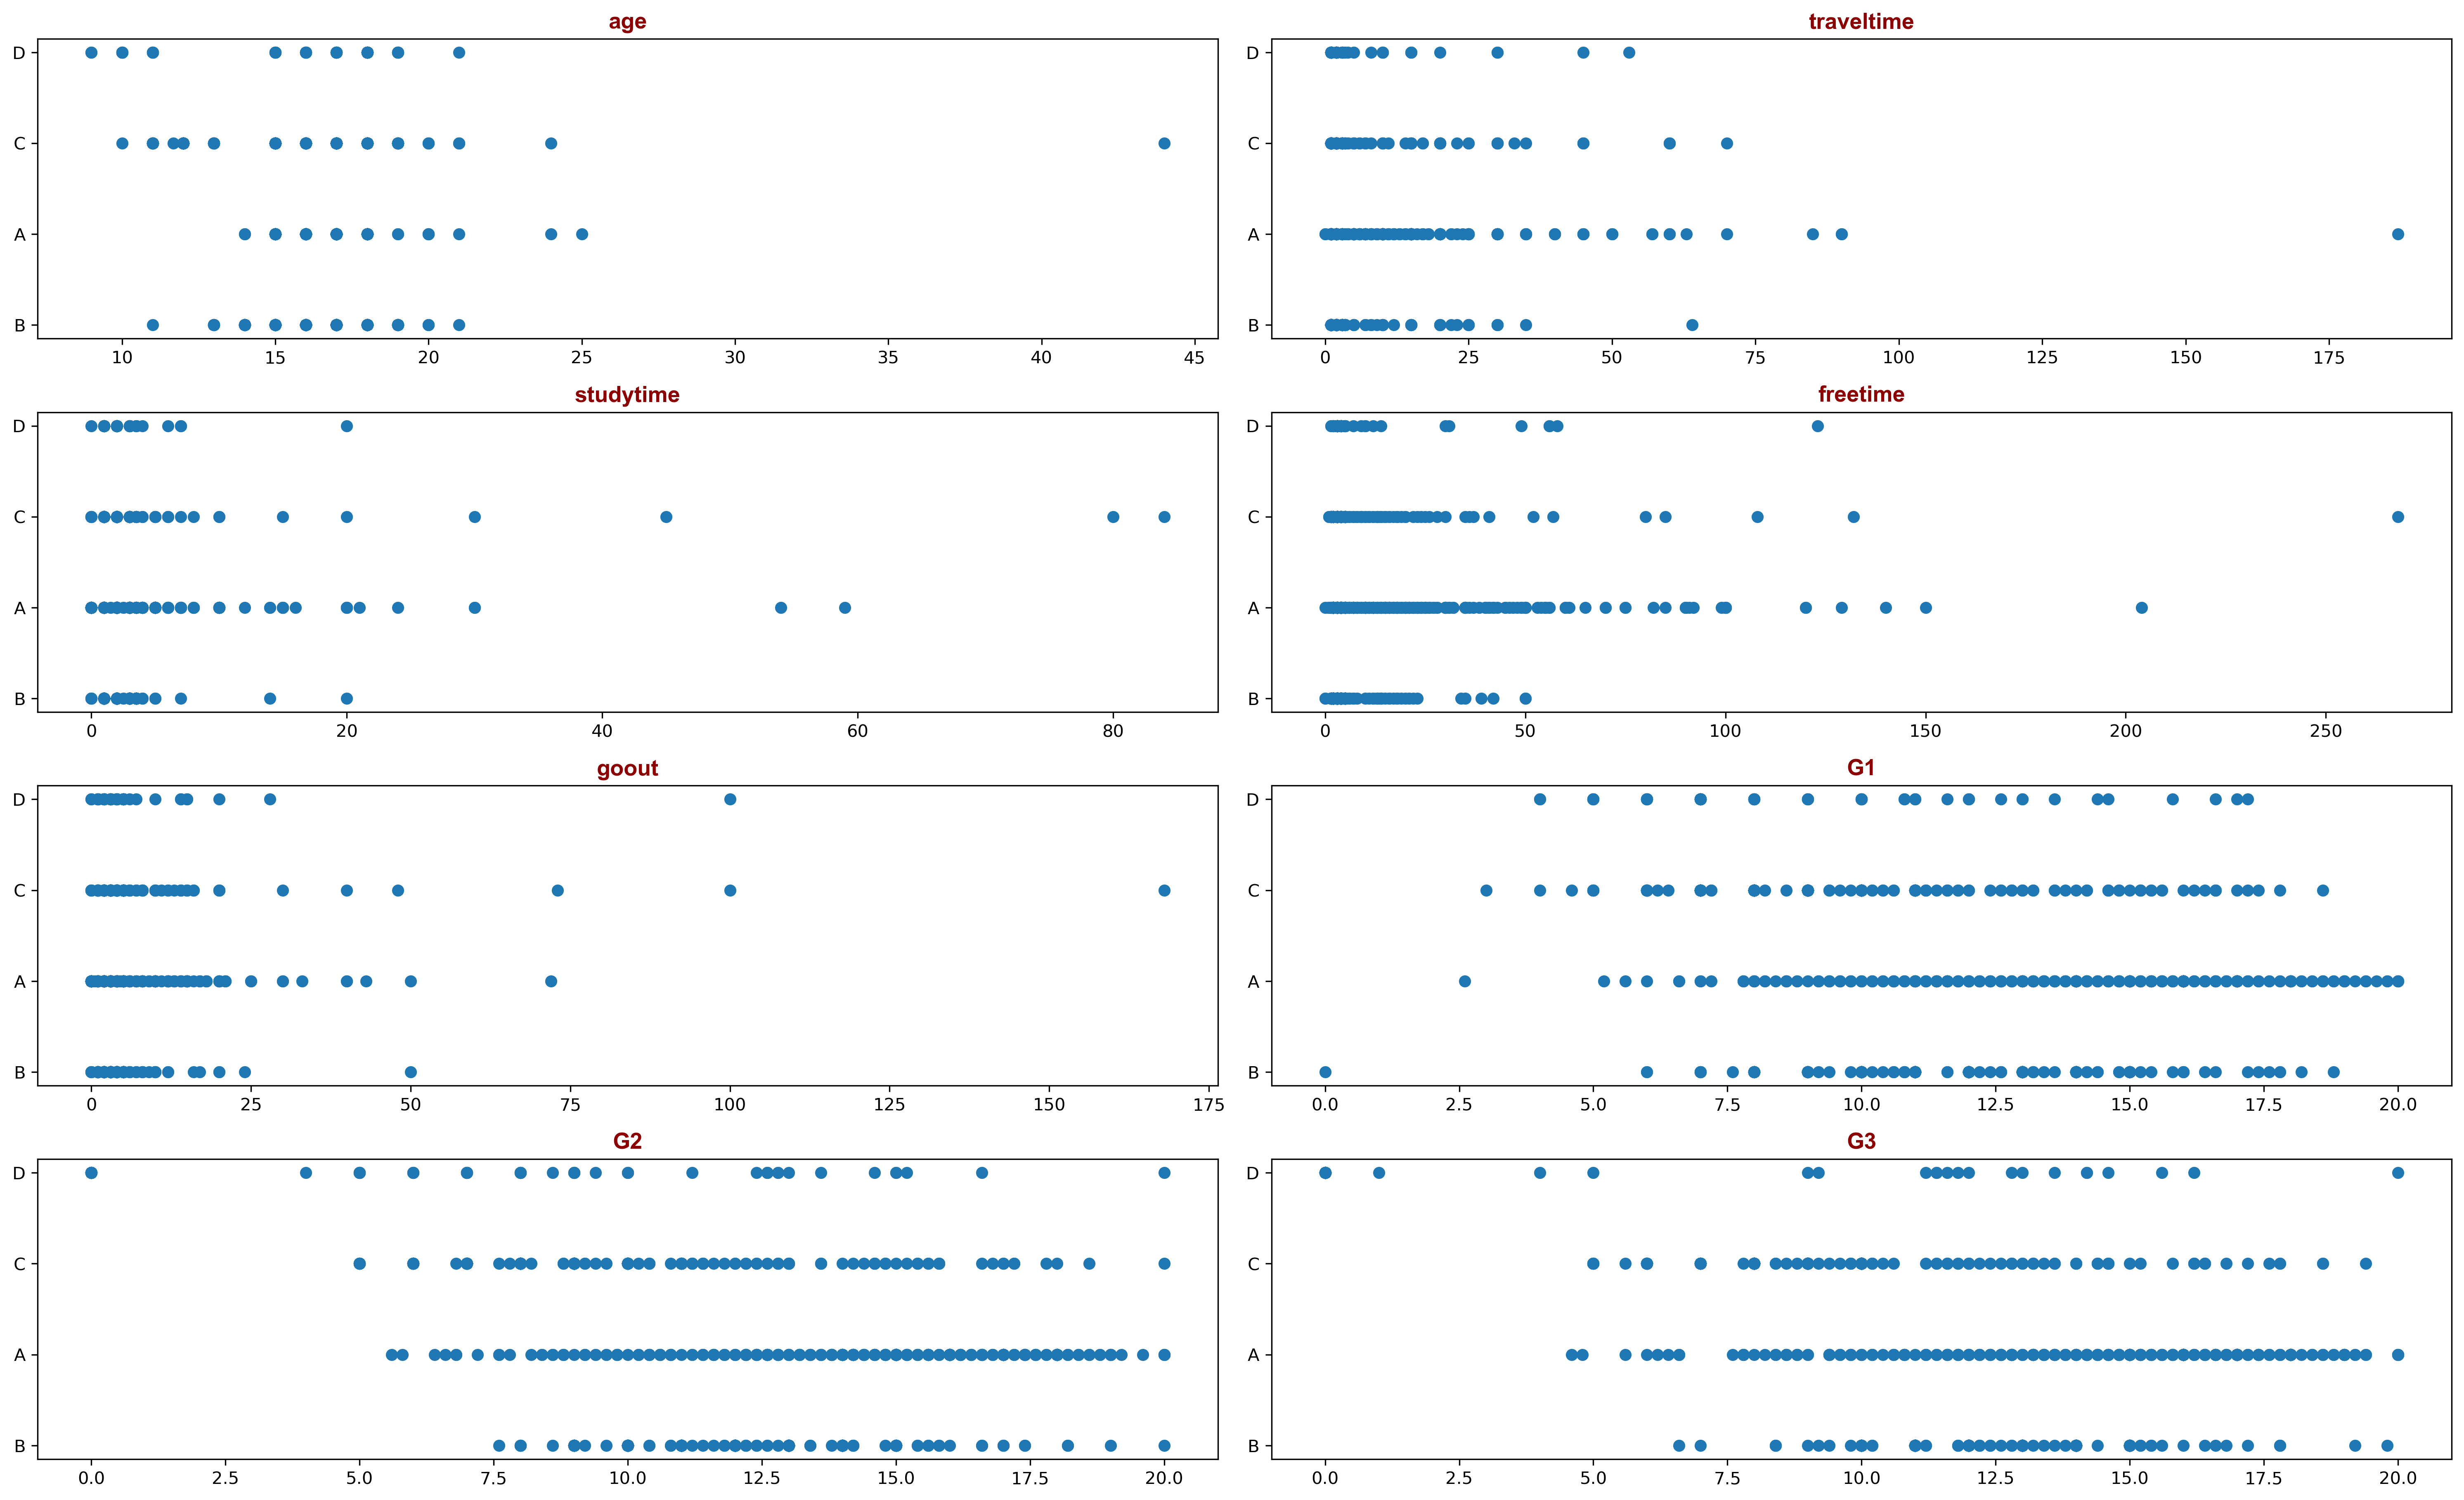

In [21]:
plt.figure(figsize=(20,15),dpi=300)
for i,col in enumerate(fill_list):
    plt.subplot(5,2,i+1)
    plt.scatter(data=findf,x=col,y="letter_grade")
    plt.title(col,fontdict=baslik_font)
plt.tight_layout()
plt.show()

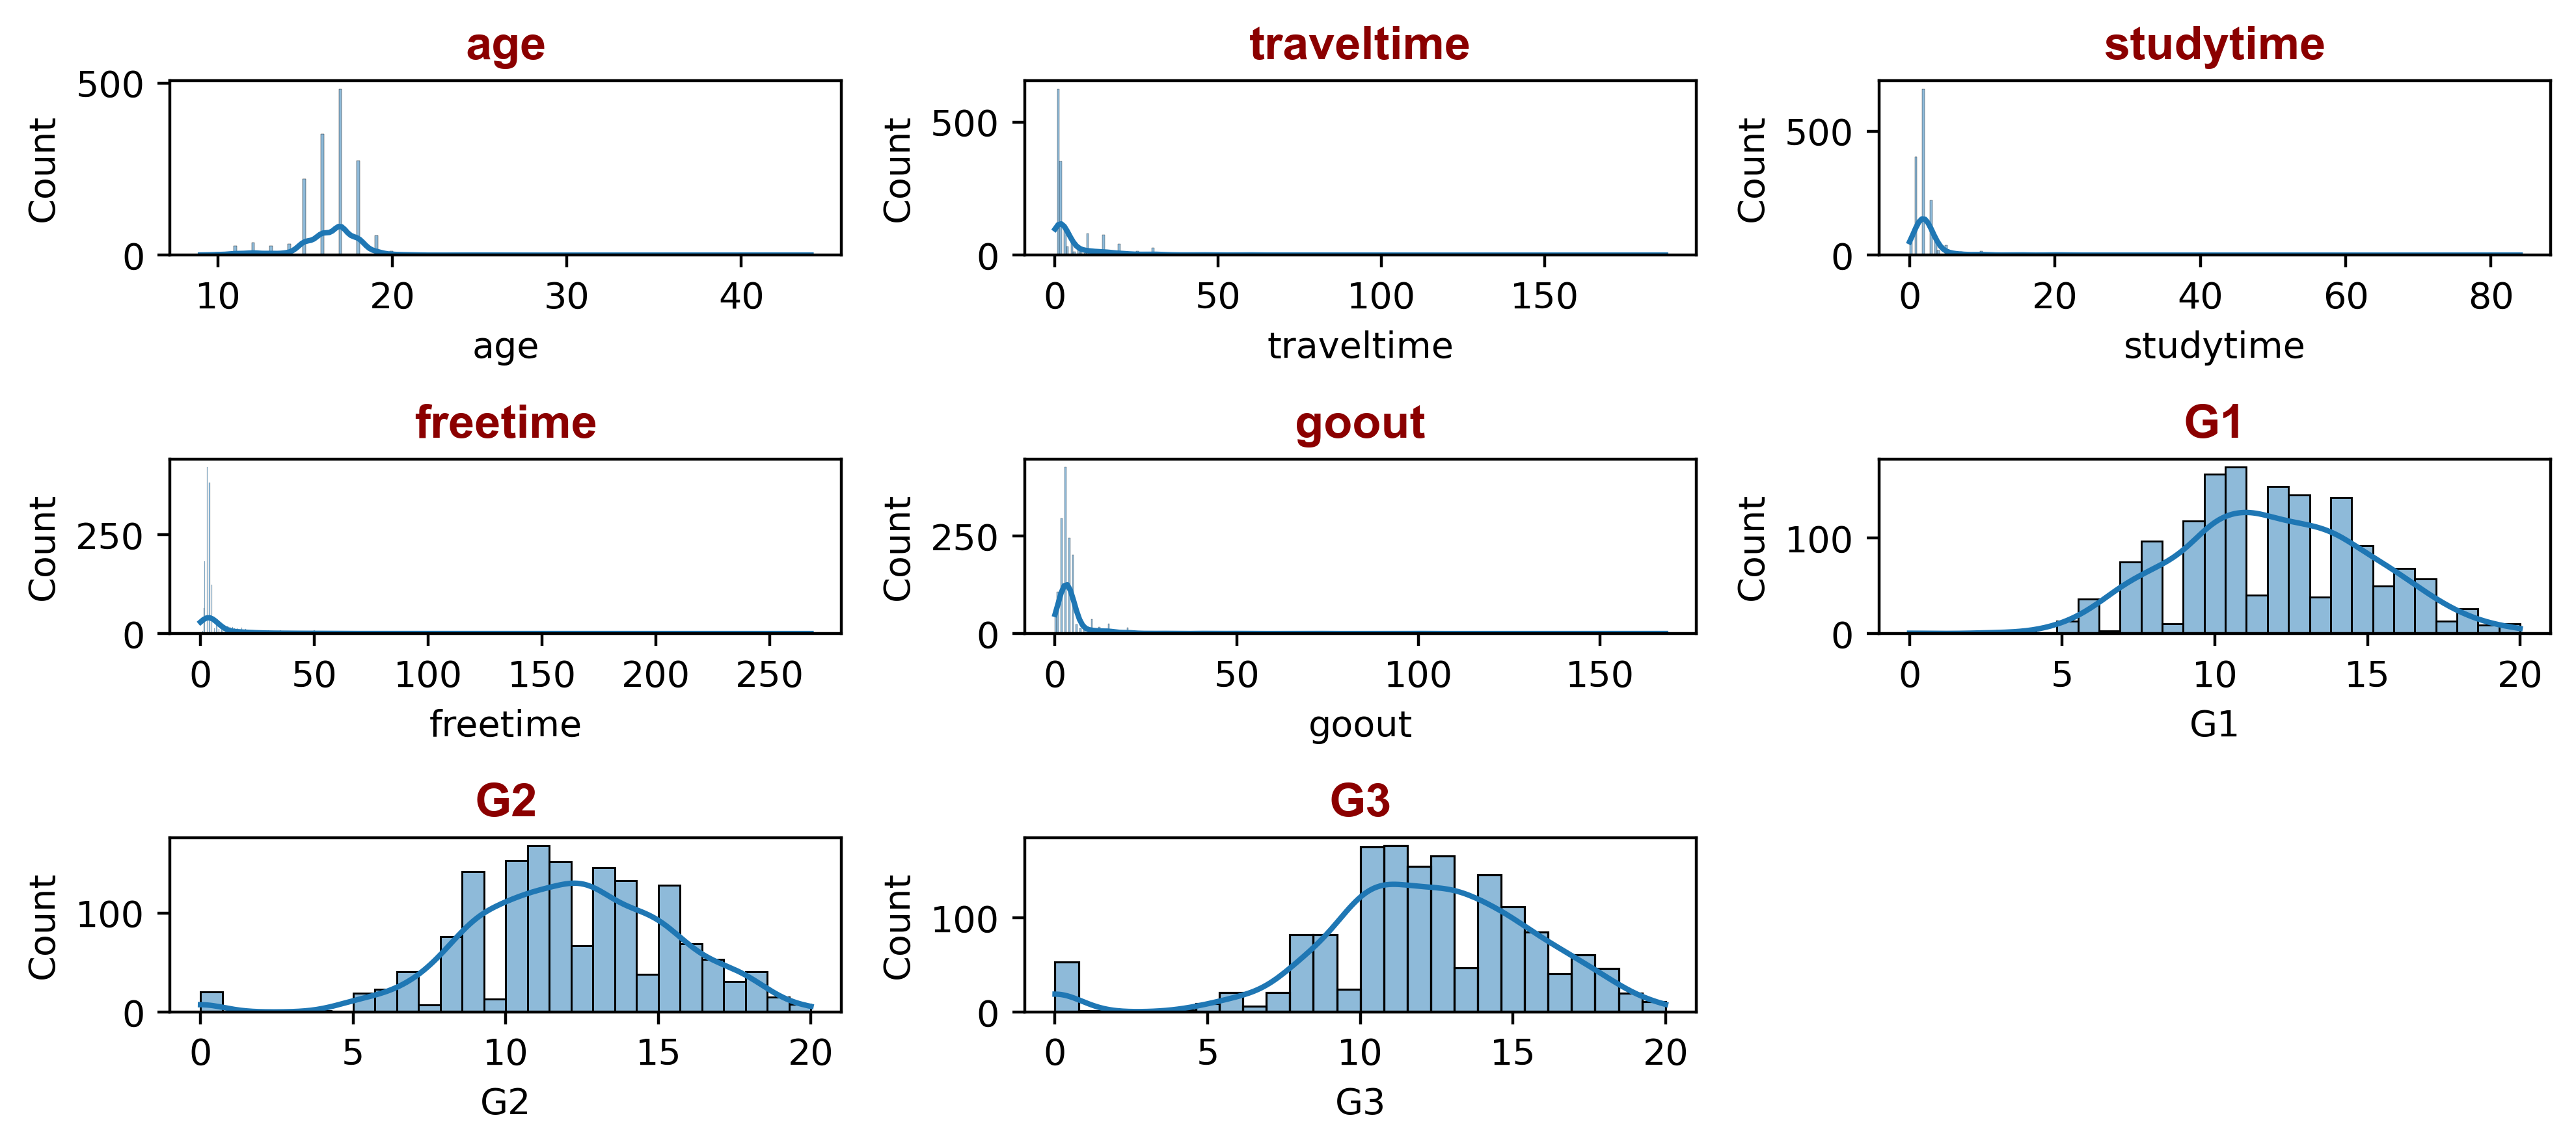

In [22]:
plt.figure(figsize=(10,7),dpi=400)
for i,col in enumerate(fill_list):
    plt.subplot(5,3,i+1)
    sns.histplot(findf[col],kde=True)
    plt.title(col,fontdict=baslik_font)
plt.tight_layout()
plt.show()

In [23]:
import scipy.stats as stats
findf[fill_list].apply(stats.zscore)

,age,traveltime,studytime,freetime,goout,G1,G2,G3
0,0.850589,-0.364479,-0.140631,-0.340904,-0.092545,-3.789935,-0.314727,-0.273815
1,0.316361,-0.455056,-0.140631,-0.340904,-0.224607,-0.914238,-0.314727,-0.273815
2,-0.752096,-0.455056,-0.140631,-0.340904,-0.356668,0.044327,0.280494,-0.007217
3,-0.752096,-0.455056,0.084495,-0.396884,-0.356668,0.683371,0.578104,0.525977
4,-0.217867,-0.455056,-0.140631,-0.340904,-0.356668,-0.275194,0.280494,0.259380
...,...,...,...,...,...,...,...,...
495,-2.354780,0.813023,0.084495,0.218900,1.228067,1.194606,0.280494,-0.007217
496,0.316361,0.813023,2.786002,2.626054,-0.620790,-2.128421,-1.564690,-1.713441
497,-0.217867,-0.092748,1.660374,1.450467,0.039516,0.747276,0.220972,0.312699
498,0.316361,2.624565,1.660374,0.946644,-0.356668,1.705841,1.887589,1.752325


### IQR method

We can use the IQR method of identifying outliers to set up a “fence” outside of Q1 and Q3. Any values that fall outside of this fence are considered outliers. To build this fence we take 1.5 times the IQR and then subtract this value from Q1 and add this value to Q3.

In [24]:
c = ['age','traveltime','studytime','freetime','goout']
for col in c :
    findf_col = findf[col]
    Q1 = findf_col.quantile(0.25) #first interquartile range
    Q3 = findf_col.quantile(0.75) #third interquartile range
    IQR = Q3-Q1   #IQR formula
    low_limit = Q1 - 1.5*IQR #low limit formula
    high_limit = Q3 + 1.5*IQR #high limit formula
    outliers_col_higher = (findf_col > high_limit) #outlier data greater than the upper limit
    findf_col[outliers_col_higher] = high_limit 
col = ['age','G1','G2','G3']
for c in col :
    findf_c = findf[c]
    Q1 = findf_c.quantile(0.25) #first interquartile range
    Q3 = findf_c.quantile(0.75) #third interquartile range
    IQR = Q3-Q1   #IQR formula
    low_limit = Q1 - 1.5*IQR #low limit formula
    high_limit = Q3 + 1.5*IQR #high limit formula
    outliers_c_lower = (findf_c < low_limit) #outlier data lesser than the lower limit
    findf_c[outliers_c_lower] = low_limit 

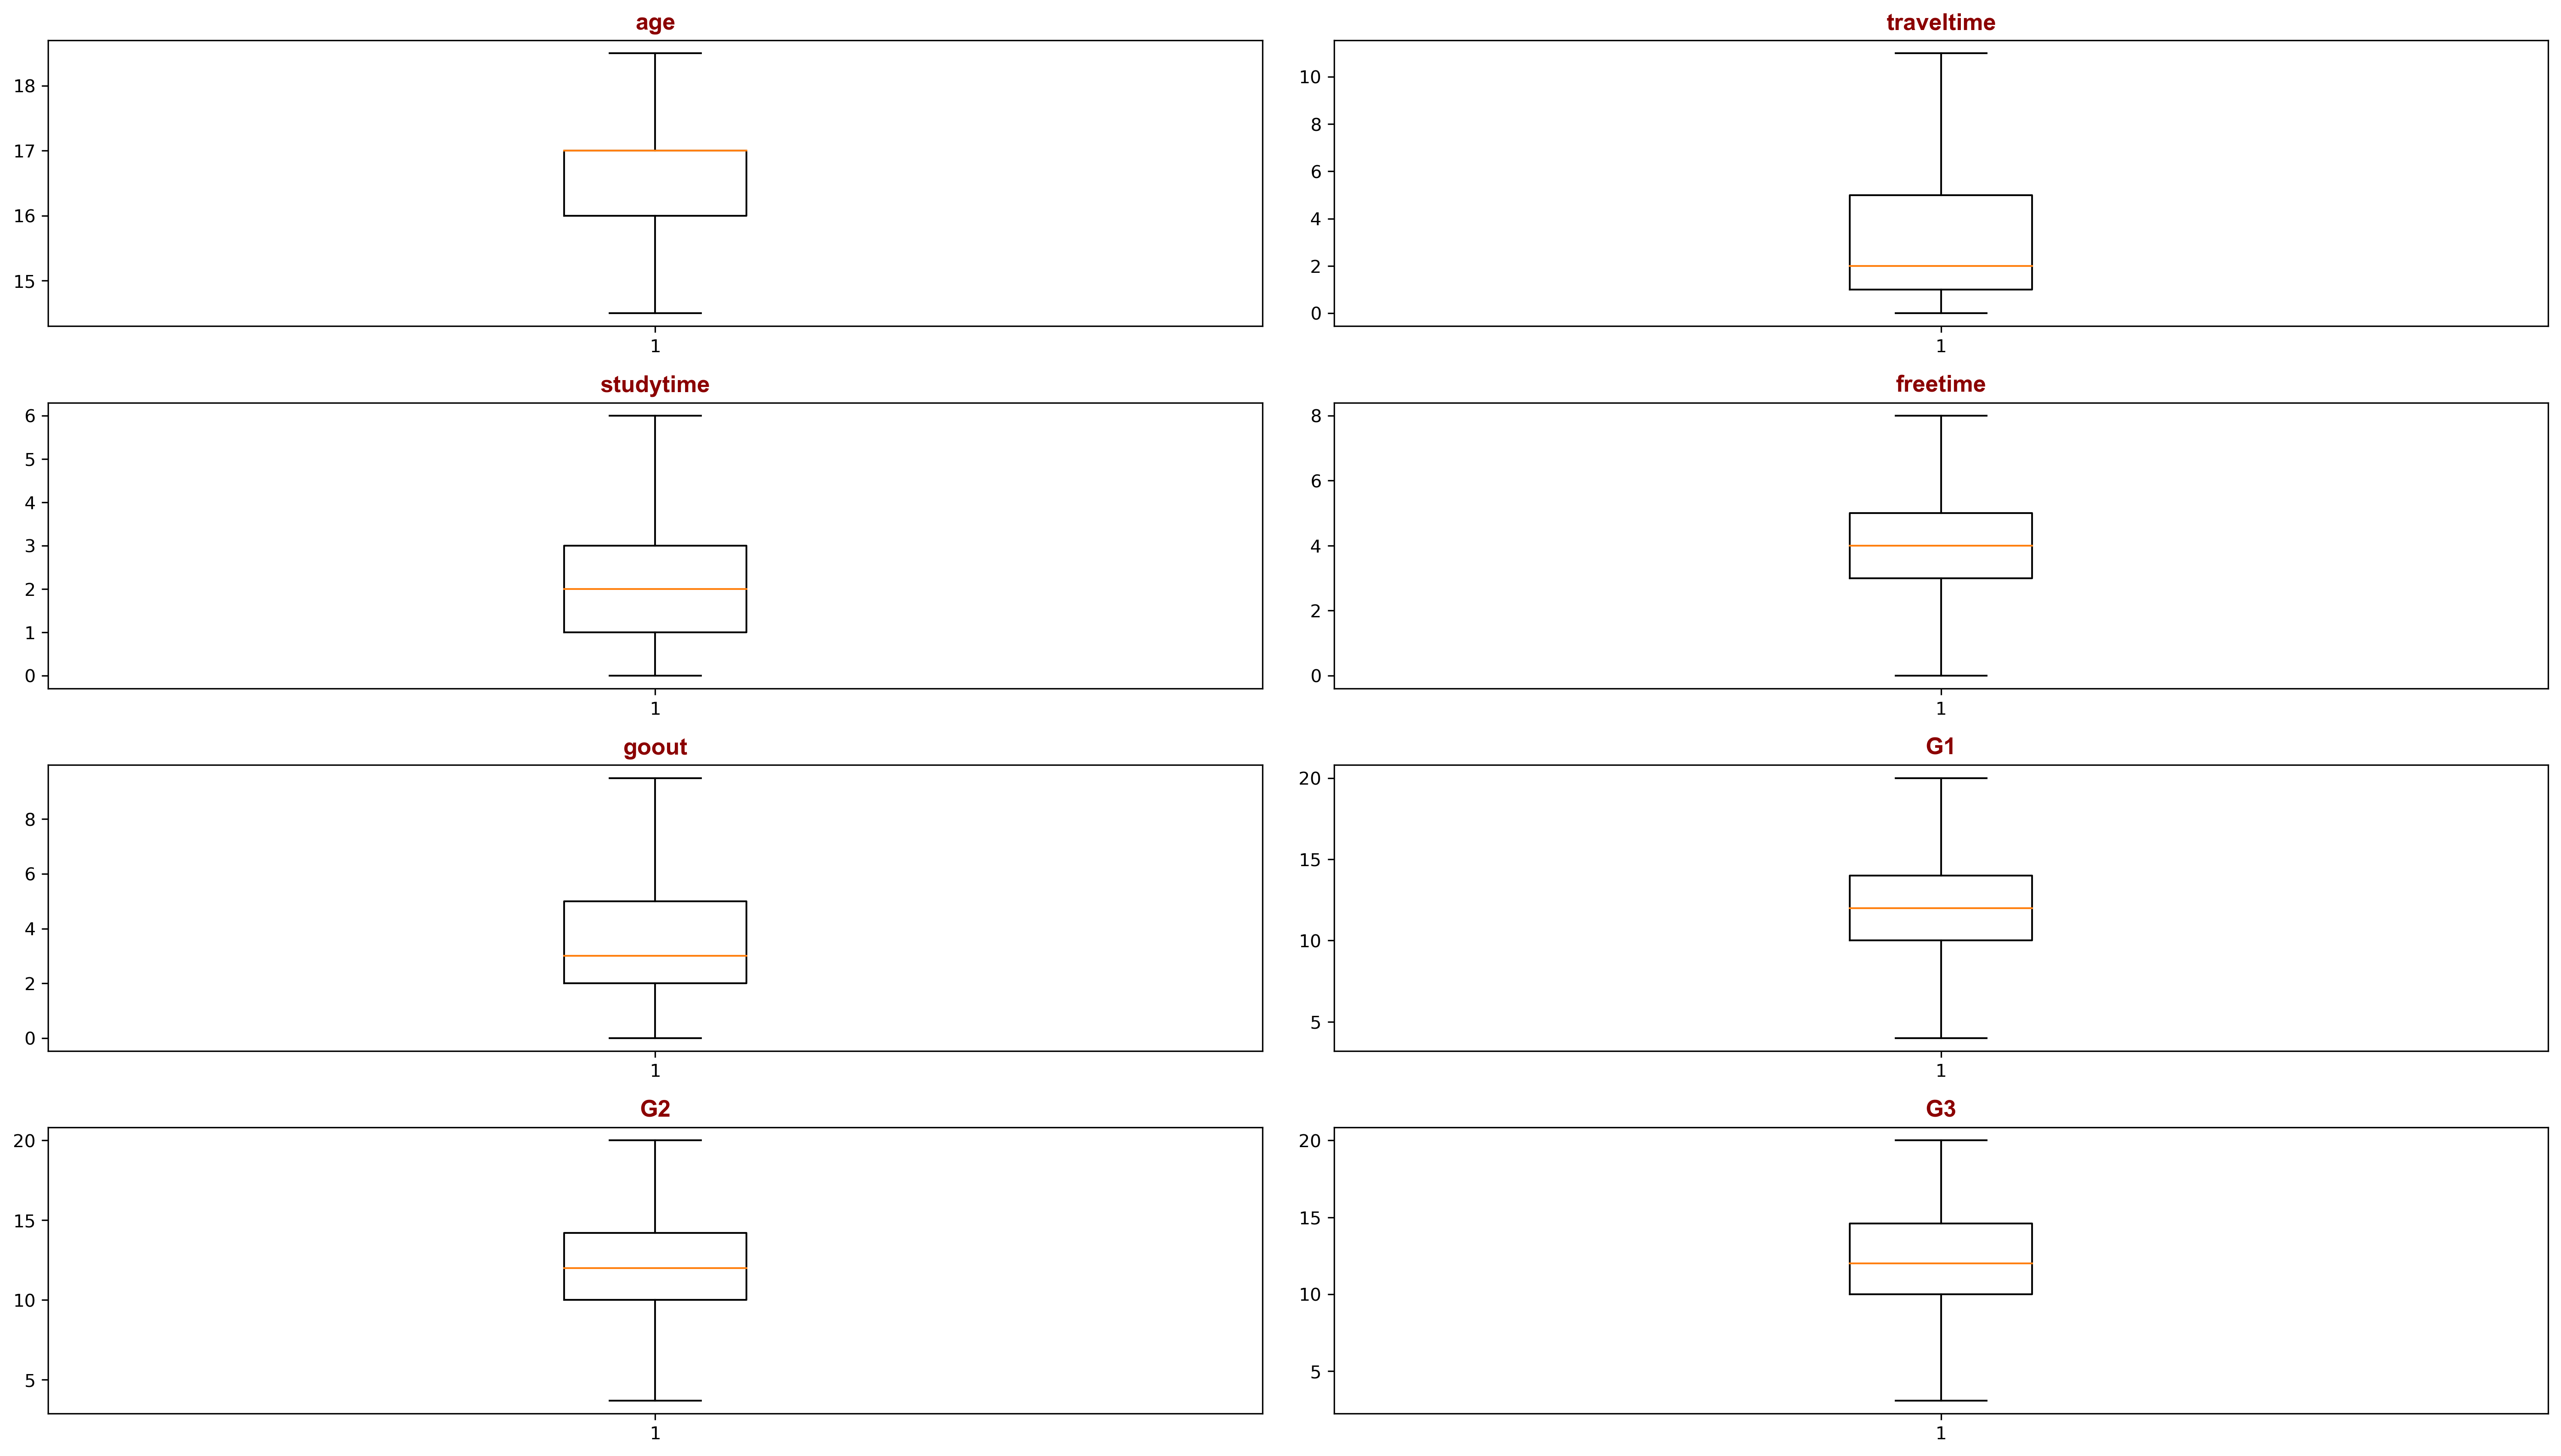

In [25]:
import matplotlib.pyplot as plt
baslik_font={'family':'arial','color':'darkred','weight':'bold','size':13}
eksen_font={'family':'arial','color':'darkblue','weight':'bold','size':10}
plt.figure(figsize=(20,14),dpi=300)
for i,col in enumerate(fill_list):
    plt.subplot(5,2,i+1)
    plt.boxplot(col, data=findf)
    plt.title(col,fontdict=baslik_font)
plt.tight_layout()
plt.show()

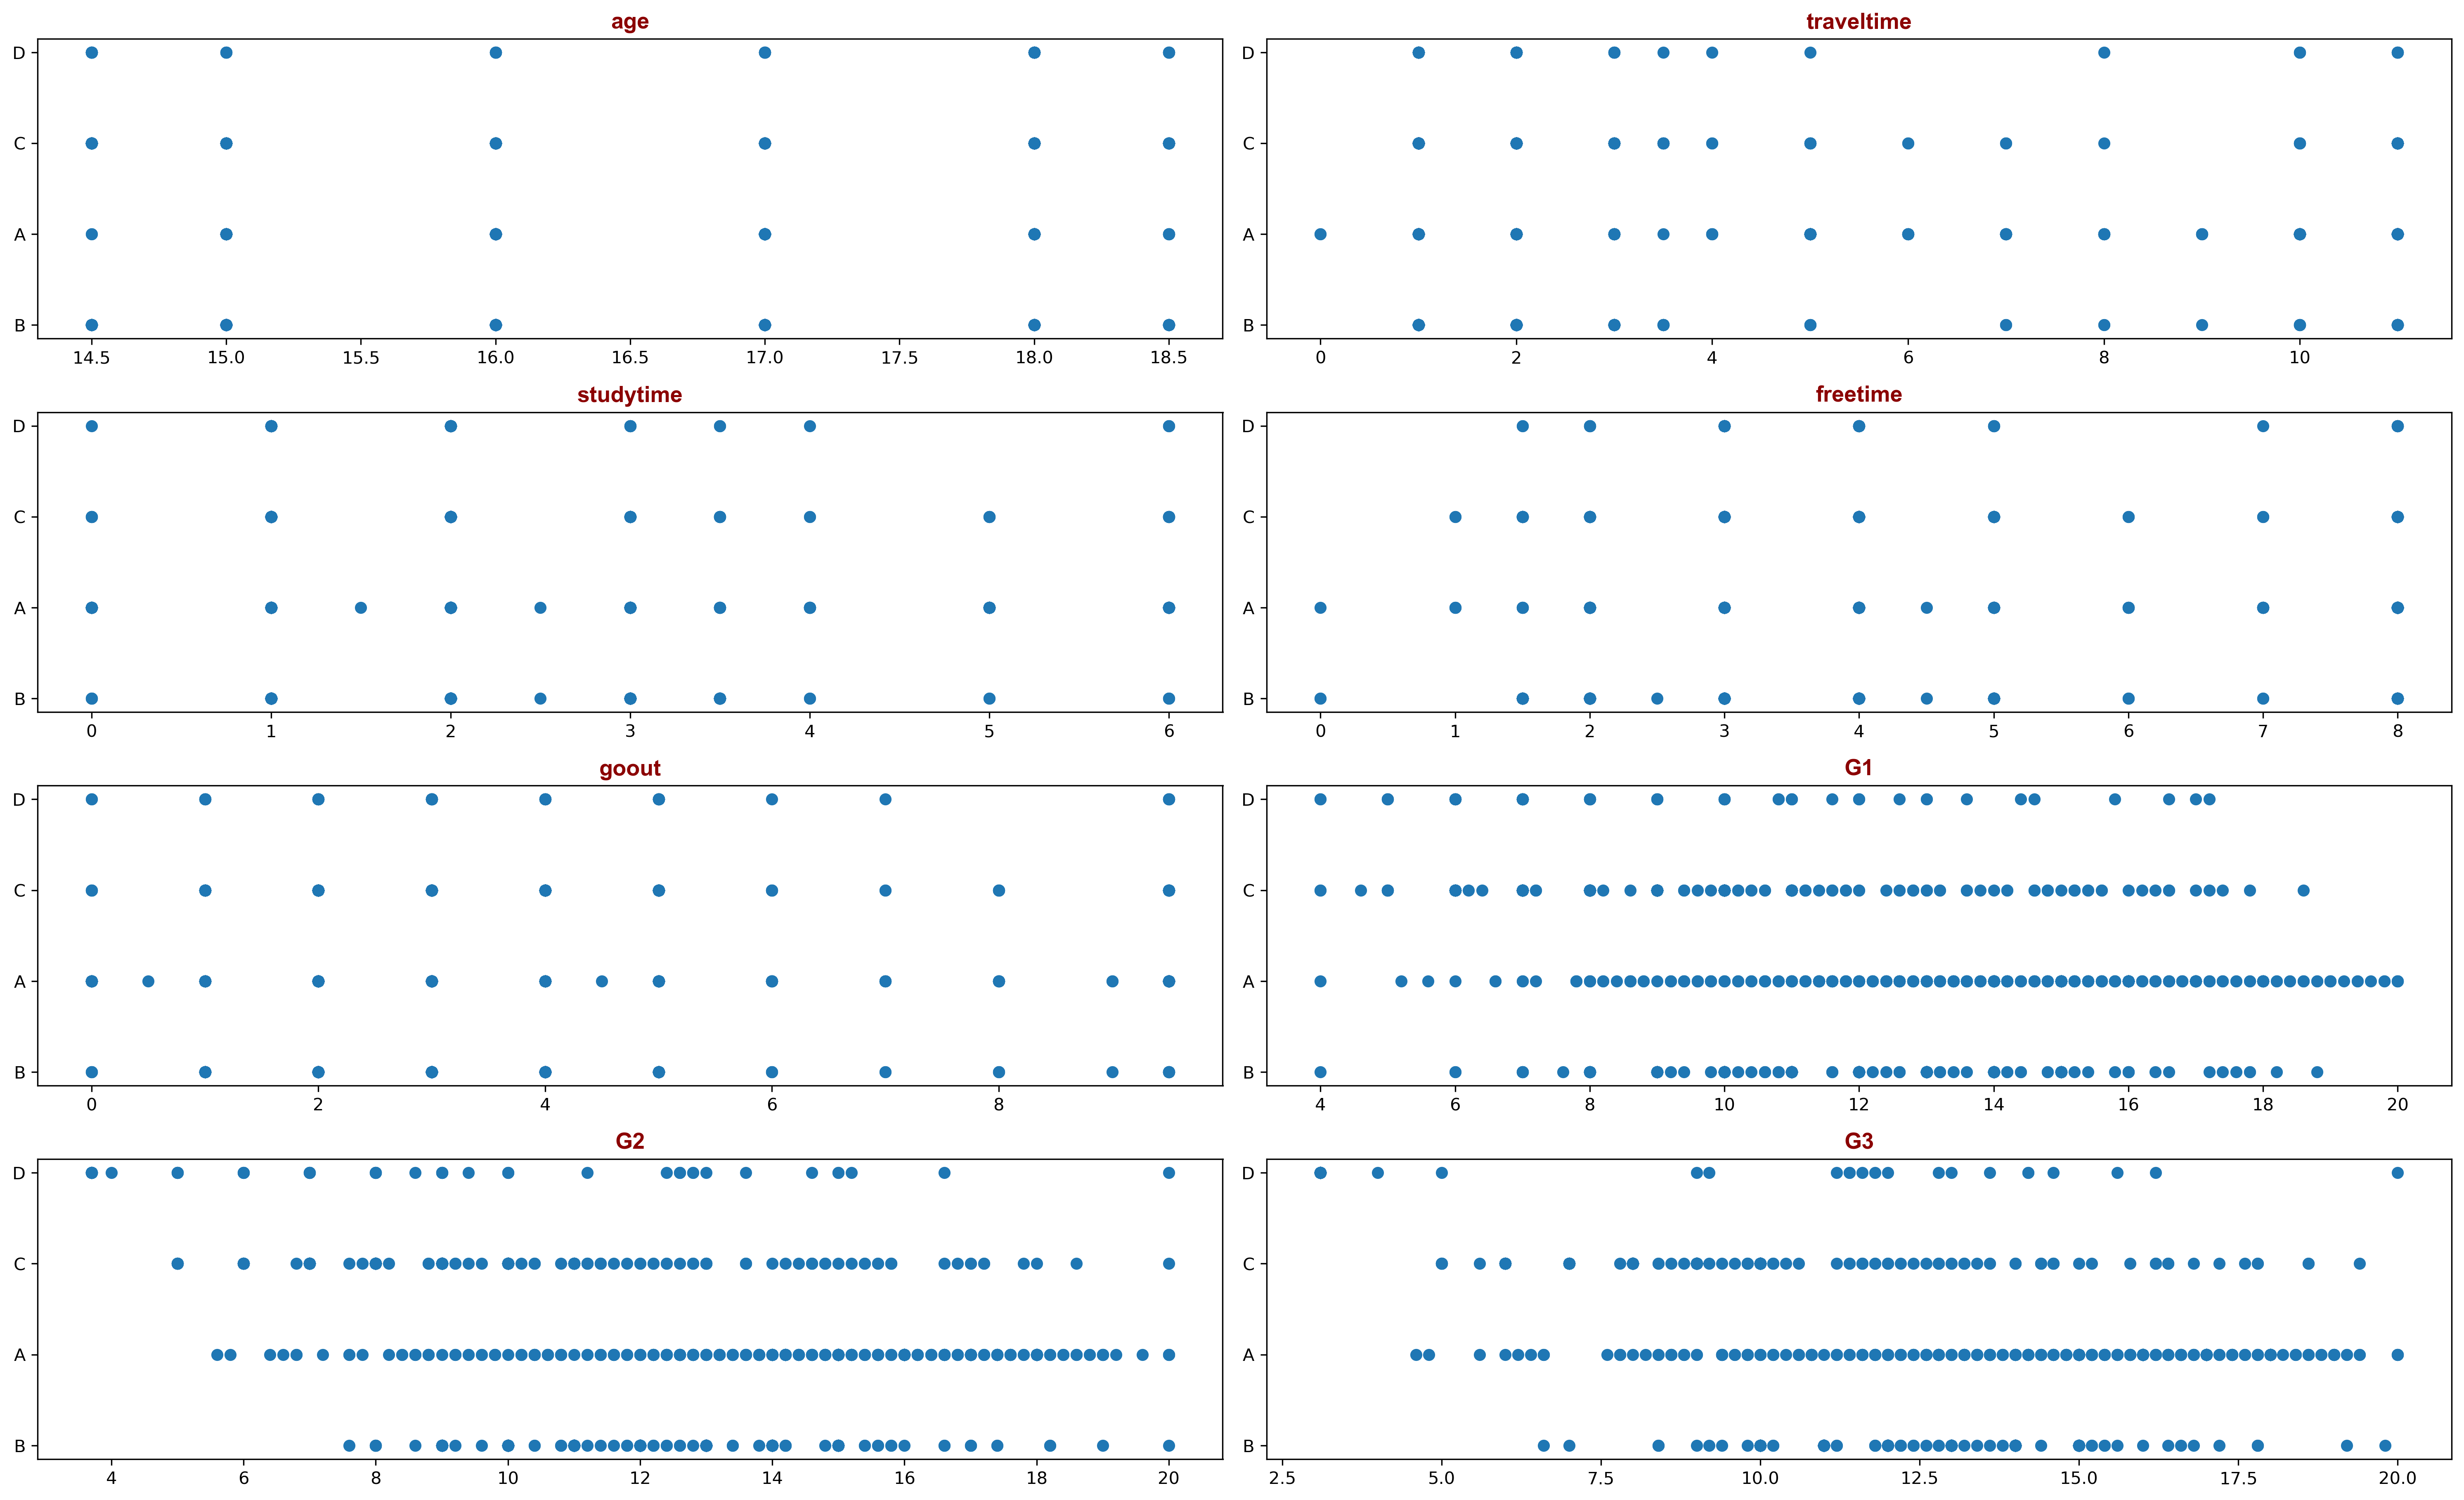

In [26]:
plt.figure(figsize=(20,15),dpi=300)
for i,col in enumerate(fill_list):
    plt.subplot(5,2,i+1)
    plt.scatter(data=findf,x=col,y="letter_grade")
    plt.title(col,fontdict=baslik_font)
plt.tight_layout()
plt.show()

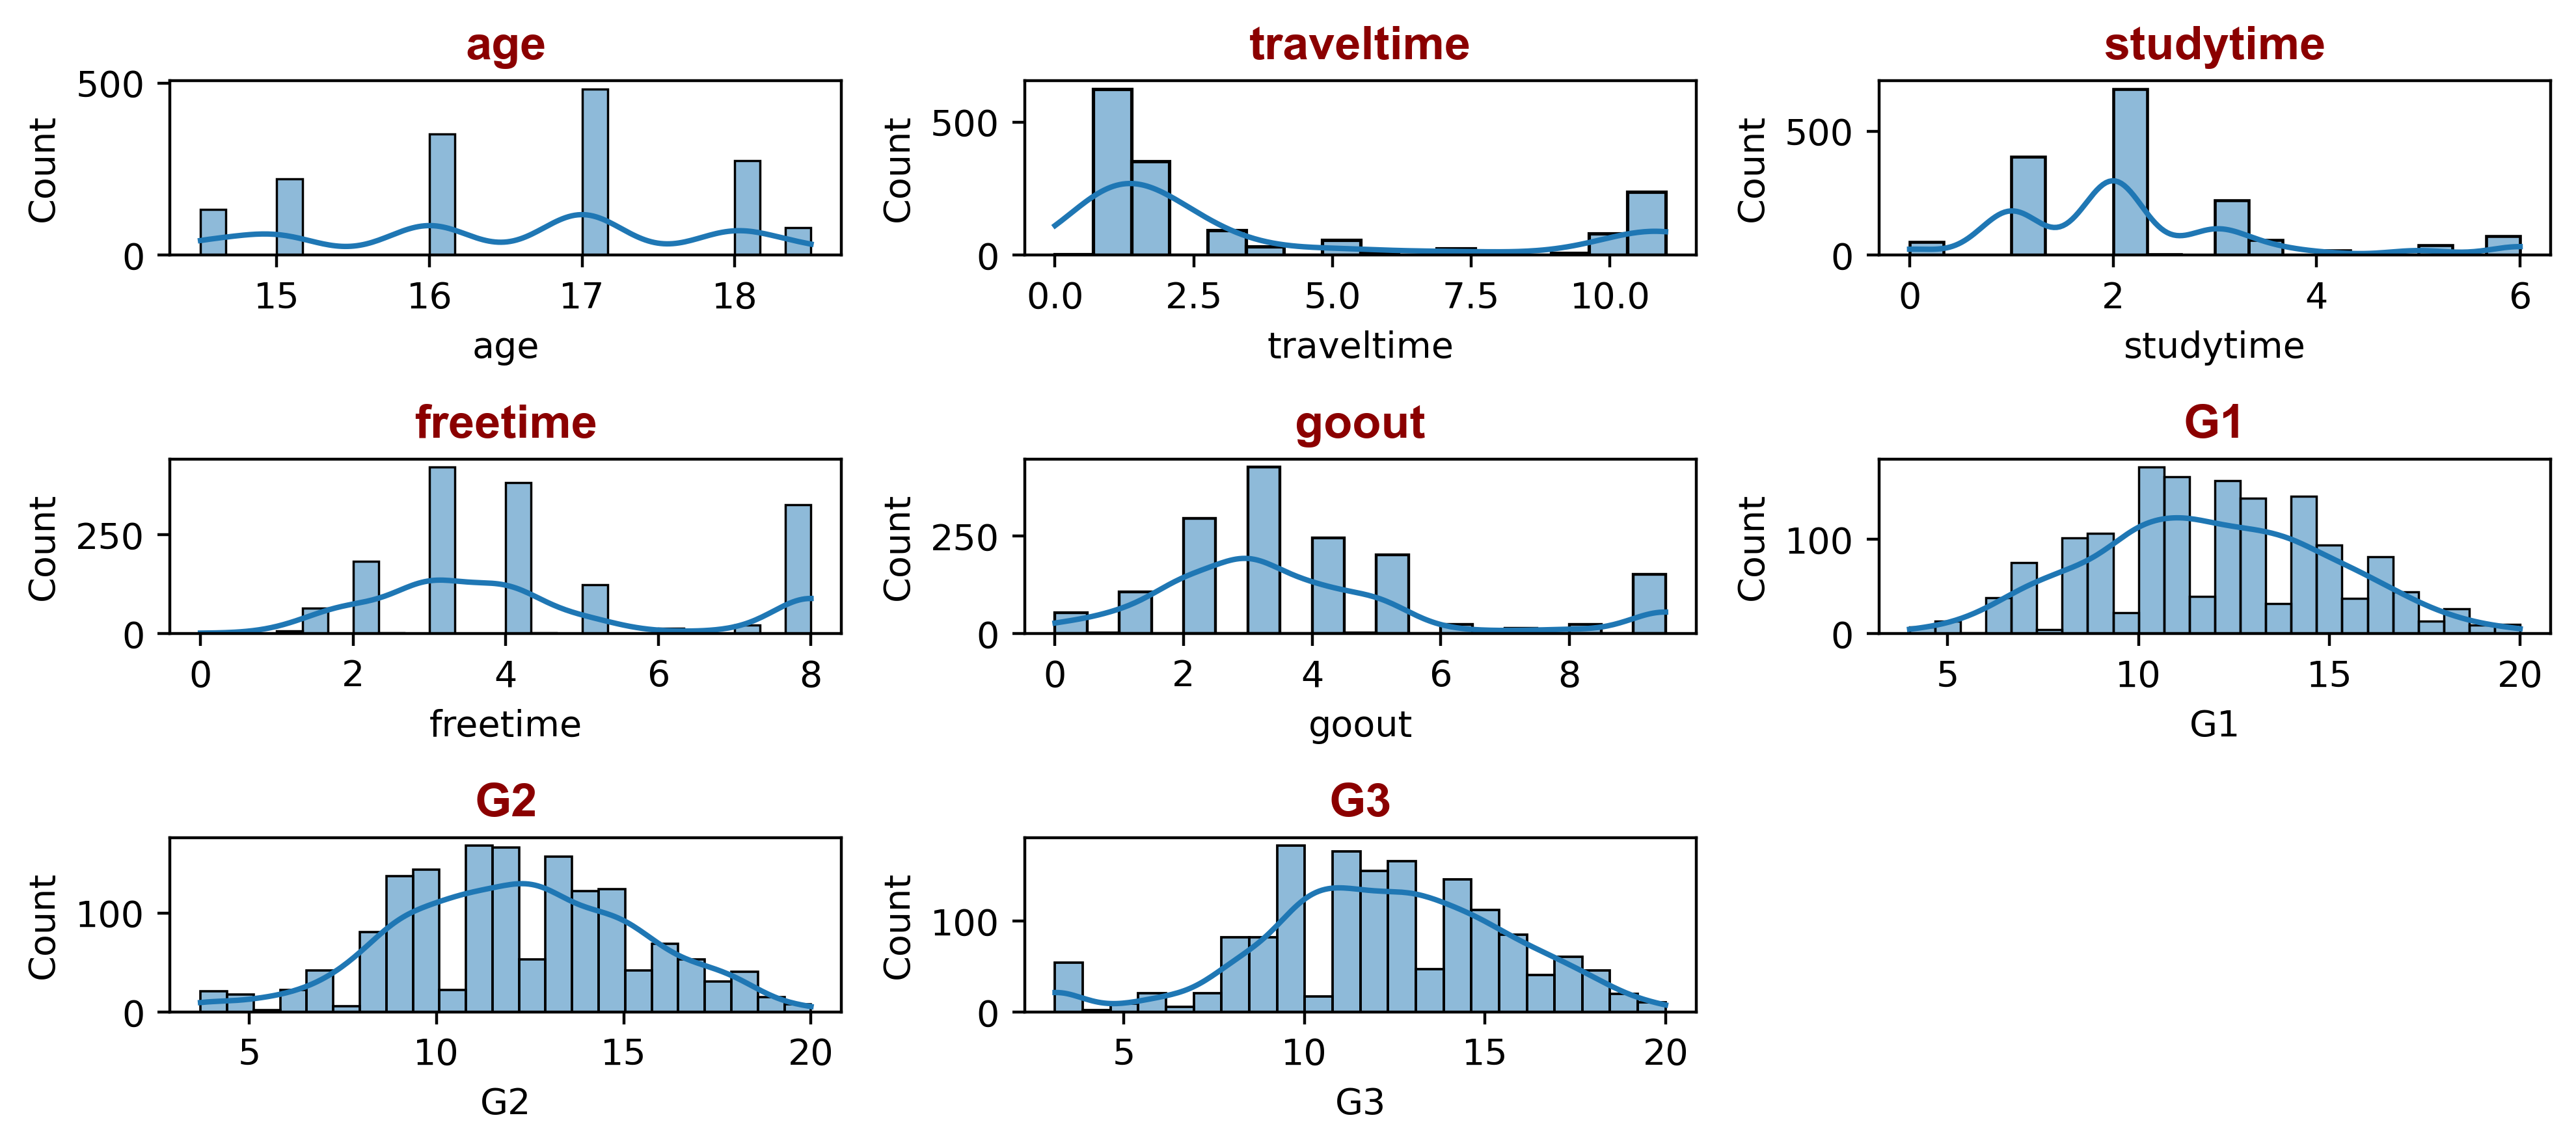

In [27]:
plt.figure(figsize=(10,7),dpi=400)
for i,col in enumerate(fill_list):
    plt.subplot(5,3,i+1)
    sns.histplot(findf[col],kde=True)
    plt.title(col,fontdict=baslik_font)
plt.tight_layout()
plt.show()

### Z-Score

Z score is also called standard score. This score helps to understand if a data value is greater or smaller than mean and how far away it is from the mean.A normal distribution is shown below and it is estimated that
68% of the data points lie between +/- 1 standard deviation.
95% of the data points lie between +/- 2 standard deviation
99.7% of the data points lie between +/- 3 standard deviation

Hence we can conclude that any outliers lying would lie such that their Value of Z-score should between -3 and 3

In [28]:
fill_list=['age','traveltime','studytime','freetime','goout','G1','G2','G3']
for col in fill_list:
    upper_limit_col=findf[col].mean()+3*findf[col].std()
    lower_limit_col=findf[col].mean()-3*findf[col].std()
    findf[col]=np.where(findf[col]>upper_limit_col,upper_limit_col,np.where(findf[col]<lower_limit_col,lower_limit_col,findf[col]))
findf

,sex,age,Medu,Fedu,traveltime,studytime,freetime,goout,G1,G2,G3,letter_grade
0,0.0,18.0,4,4.0,2.0,2.0,3.0,4.0,4.0,11.0,11.0,B
1,0.0,17.0,1,1.0,1.0,2.0,3.0,3.0,9.0,11.0,11.0,B
2,0.0,15.0,1,1.0,1.0,2.0,3.0,2.0,12.0,13.0,12.0,B
3,0.0,15.0,4,2.0,1.0,3.0,2.0,2.0,14.0,14.0,14.0,B
4,0.0,16.0,3,3.0,1.0,2.0,3.0,2.0,11.0,13.0,13.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...
495,1.0,14.5,2,3.0,11.0,3.0,8.0,9.5,15.6,13.0,12.0,C
496,0.0,17.0,3,1.0,11.0,6.0,8.0,0.0,5.2,6.8,5.6,A
497,1.0,16.0,1,1.0,5.0,6.0,8.0,5.0,14.2,12.8,13.2,A
498,0.0,17.0,2,2.0,11.0,6.0,8.0,2.0,17.2,18.4,18.6,A


In [29]:
import scipy.stats as stats
findf[fill_list].apply(stats.zscore)


,age,traveltime,studytime,freetime,goout,G1,G2,G3
0,1.241523,-0.477041,-0.141117,-0.631451,0.091357,-2.523170,-0.344283,-0.330348
1,0.399110,-0.738972,-0.141117,-0.631451,-0.329075,-0.919205,-0.344283,-0.330348
2,-1.285717,-0.738972,-0.141117,-0.631451,-0.749508,0.043174,0.278606,-0.039253
3,-1.285717,-0.738972,0.630156,-1.099844,-0.749508,0.684760,0.590050,0.542938
4,-0.443304,-0.738972,-0.141117,-0.631451,-0.749508,-0.277619,0.278606,0.251843
...,...,...,...,...,...,...,...,...
495,-1.706924,1.880341,0.630156,1.710514,2.403734,1.198029,0.278606,-0.039253
496,0.399110,1.880341,2.943974,1.710514,-1.590372,-2.138218,-1.652350,-1.902263
497,-0.443304,0.308753,2.943974,1.710514,0.511789,0.748919,0.216317,0.310062
498,0.399110,1.880341,2.943974,1.710514,-0.749508,1.711298,1.960406,1.881977


# Saving of Pre-processed Data

In [30]:
#findf.to_csv(r"C:\Users\NAMAN GUPTA\Desktop\DS Project\data\pro.csv")

# Data Analysis

In [31]:
df=pd.read_csv(r"C:\Users\NAMAN GUPTA\Desktop\DS Project\data\pro.csv")
df.drop("Unnamed: 0",axis=1,inplace=True)

#We are adding another column called G_Mean which would act as a mean score for 
#all three G1,G2,G3 

df['G_mean']=(df.G1+df.G2+df.G3)/3


## Correlation

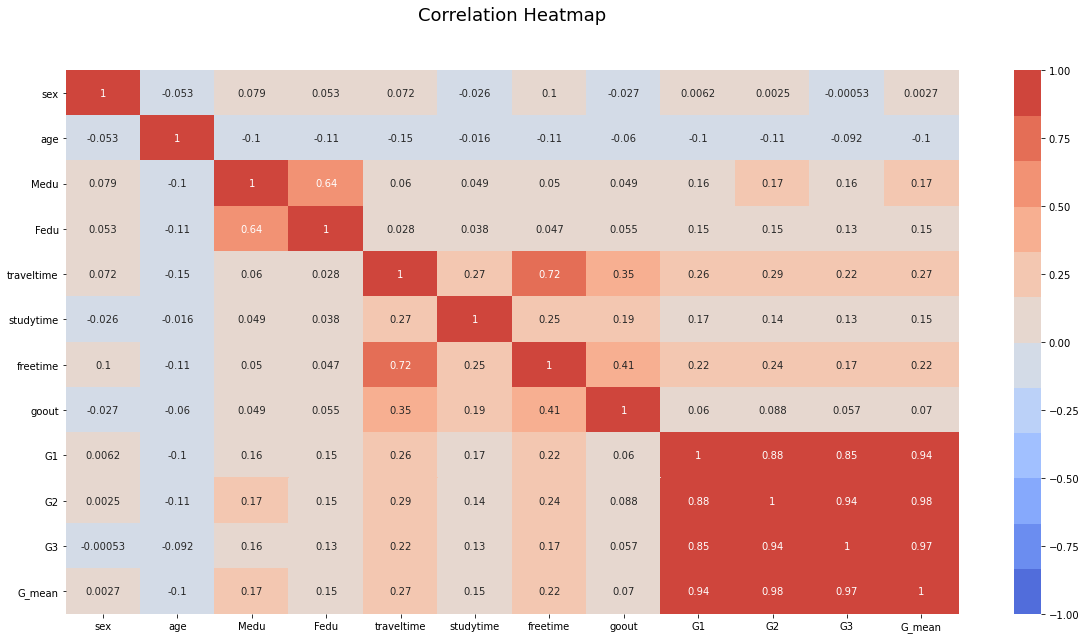

In [32]:
plt.figure(figsize=(20,10))
colormap=sns.color_palette("coolwarm",12)
heatmap=sns.heatmap(df.corr(),vmin=-1,vmax=1,annot=True, cmap=colormap)
heatmap.set_title('Correlation Heatmap',fontdict={'fontsize':18},pad=50);
plt.show()

## Comparing between genders

<AxesSubplot:xlabel='sex', ylabel='count'>

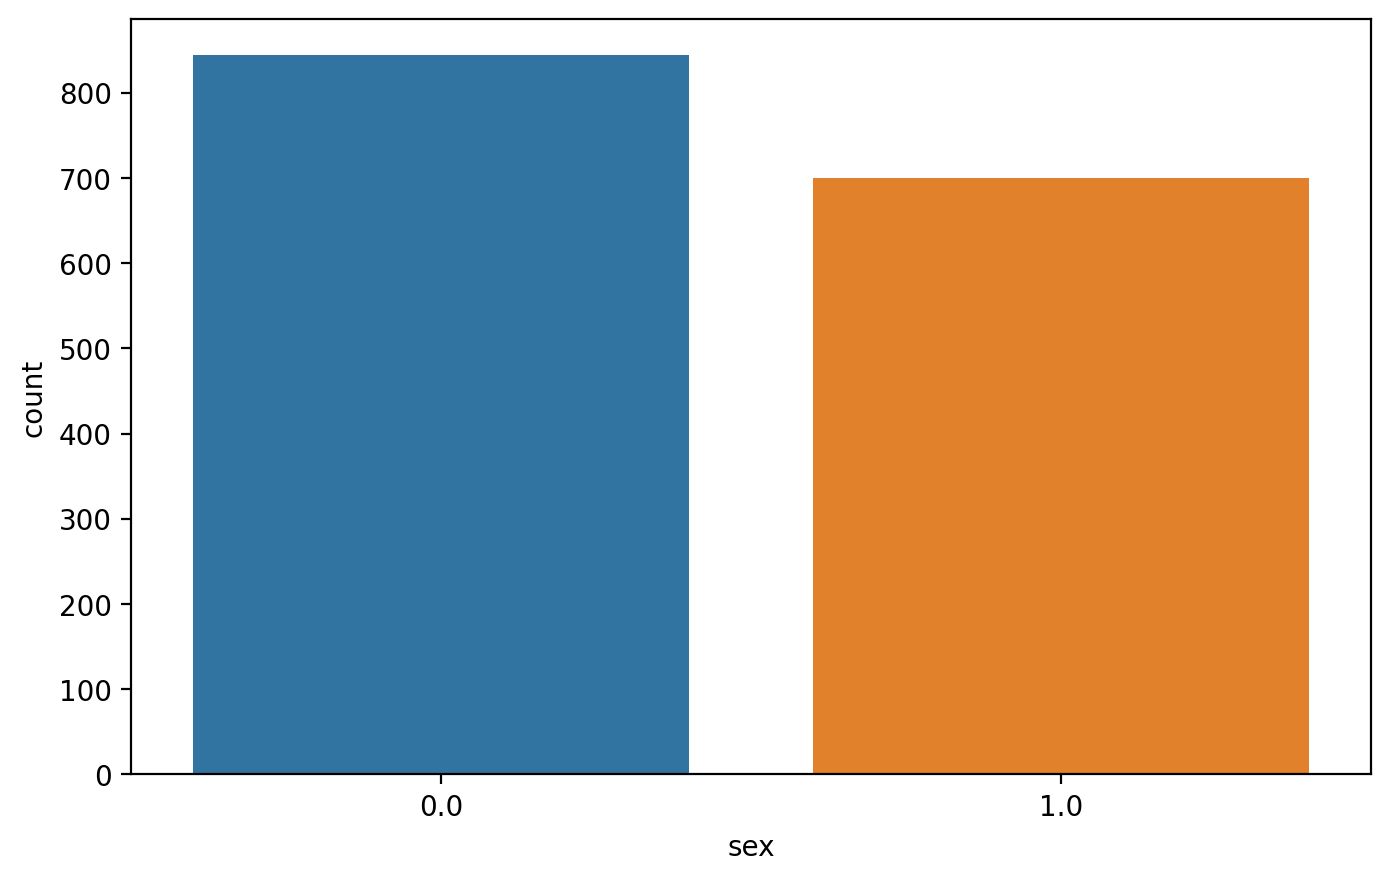

In [33]:
grade=["G1","G2","G3"]
plt.figure(figsize=(8,5),dpi=200)
sns.countplot('sex',data=df)

<AxesSubplot:xlabel='sex', ylabel='G_mean'>

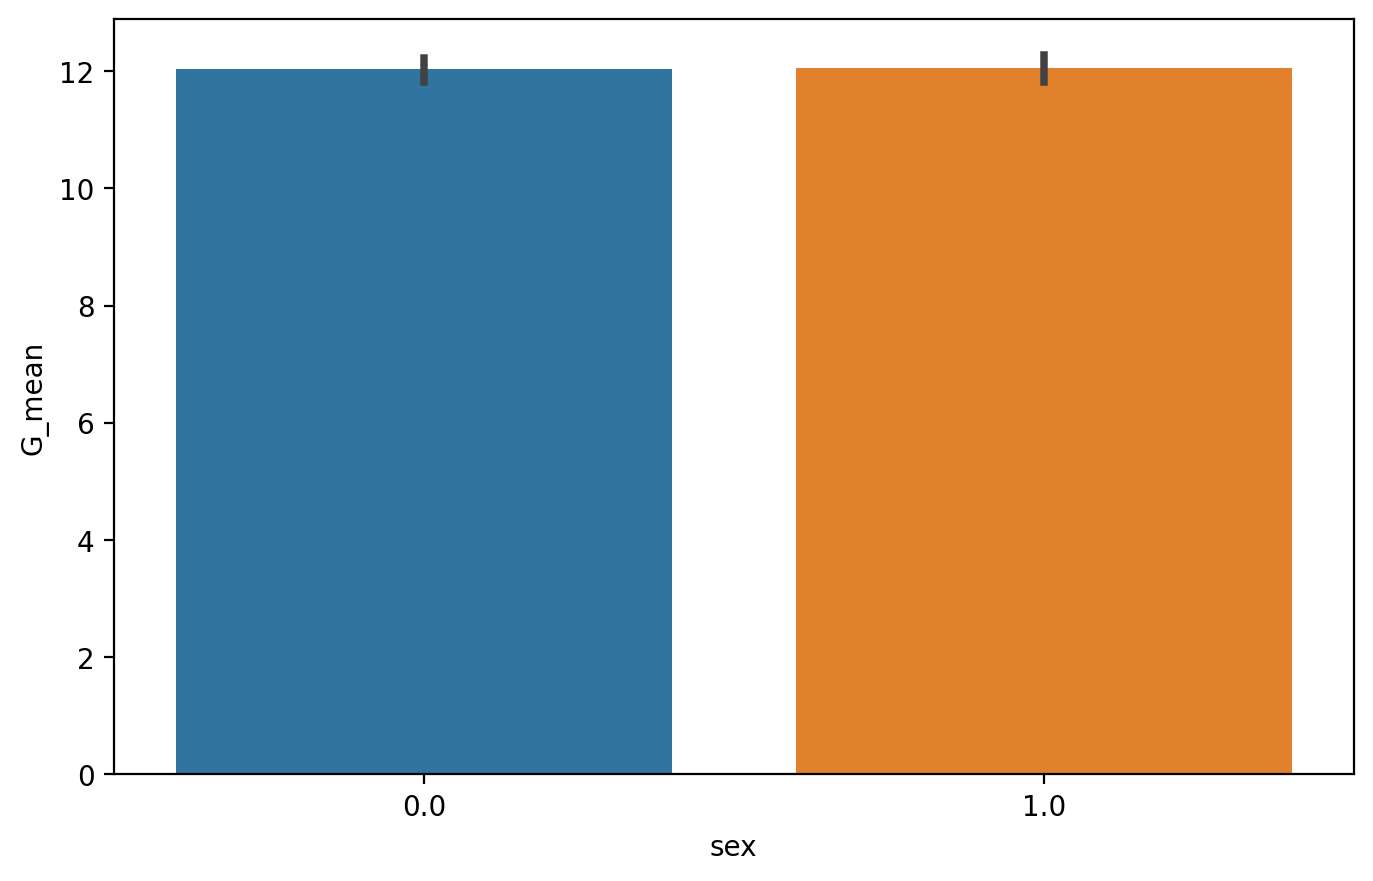

In [34]:
plt.figure(figsize=(8,5),dpi=200)
sns.barplot(x="sex",y="G_mean",data=df)

We can observe that G_mean for both genders is almost same

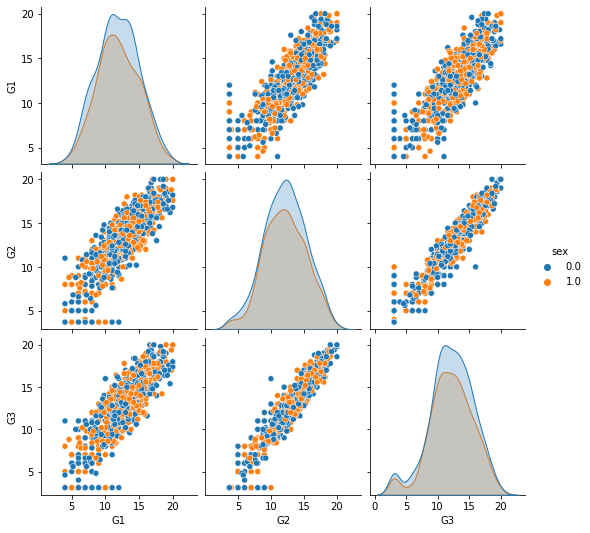

In [35]:
sns.pairplot(
    df,
    x_vars=["G1", "G2","G3"],
    y_vars=["G1", "G2", "G3"],
    hue="sex"
)

## Comparing between Fedu,Medu and G_mean  

<AxesSubplot:xlabel='Fedu', ylabel='G_mean'>

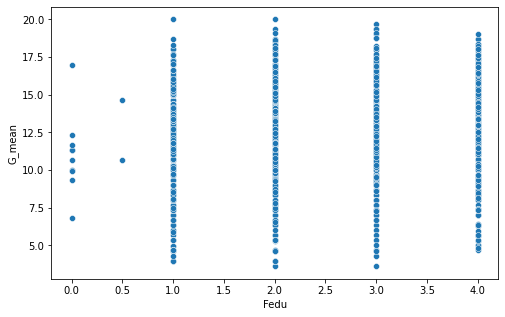

In [36]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Fedu',y='G_mean',data=df)

<AxesSubplot:xlabel='Medu', ylabel='G_mean'>

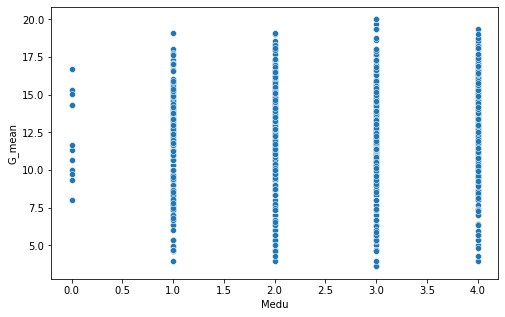

In [37]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Medu',y='G_mean',data=df)

## Comparing age and Grade

<AxesSubplot:xlabel='age', ylabel='Count'>

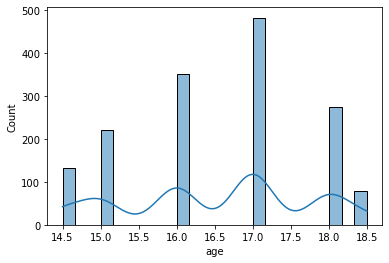

In [38]:
sns.histplot(x='age',data=df,kde=True)

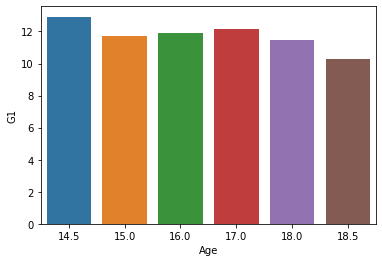

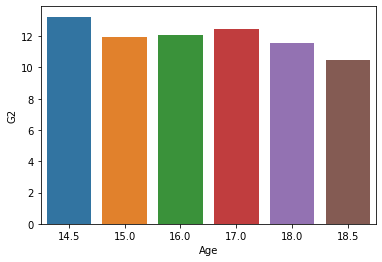

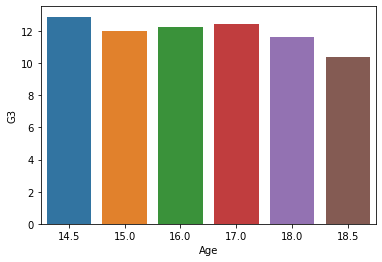

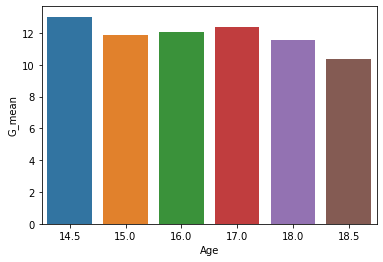

In [39]:
age_grade=df.groupby('age').aggregate({'G_mean':'mean','G1':'mean','G2':'mean','G3':'mean'})
metric=['G1','G2','G3','G_mean']
age_grade.reset_index(inplace=True)
for m in metric:
    sns.barplot(data=age_grade,x='age',y=m).set(xlabel='Age',ylabel=m)
    plt.show()

## Comparing Time Productivity vs Grade

<AxesSubplot:xlabel='Time Productivity', ylabel='G_mean'>

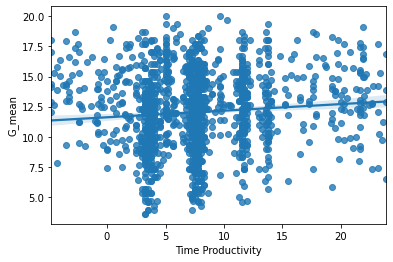

In [40]:
df['Time Productivity'] = 4* df['studytime']-0.25*df['freetime']+0.25*df['goout']-0.25*df['traveltime']
sns.regplot(x='Time Productivity', y='G_mean', data=df)

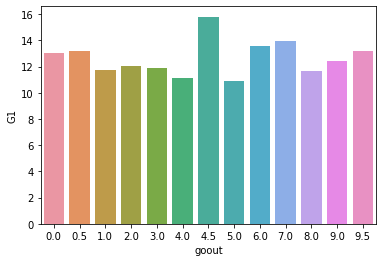

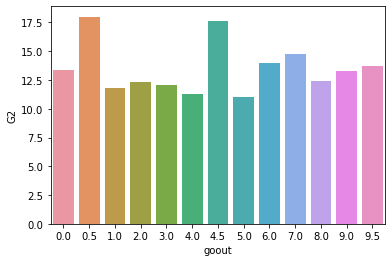

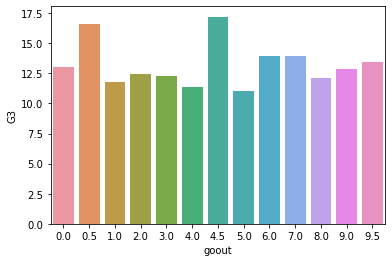

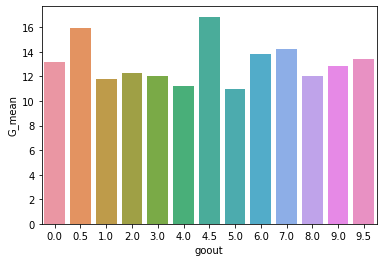

In [41]:
out_gr = df.groupby("goout").aggregate({"G_mean": "mean", "G1": "mean", "G2": "mean", "G3": "mean"}).reset_index()
for m in metric:
    sns.barplot(data=out_gr, x='goout', y=m)
    plt.show()

# Algorithms and Modelling
We will use following Algorithms/Models-Naive Bayes/KNN/SVM/Random forest<br>Before applying the necessary models we shall first <br>import models and necessary packages like **train_test_split**,**GridSeachCV**,**accuracy_score**,**classification_report** etc.

Few of terminologies involved

1. A train test split is when you split your data into a training set and a testing set
2. GridSearchCV -GridSearchCV is the process of performing hyperparameter tuning in order to determine the optimal values for a given model GridSearchCV tries all the combinations of the values passed in the dictionary and evaluates the model for each combination using the Cross-Validation method.
    1. What is Cross-Validation- Cross validation takes a given size of block of data set and uses it for training and rest of dataset for testing,<br>after the process, it iterates to next block of data set and continues the process.Hence basically every block of data is used for testing and training.
3. Classification Report-A Classification report is used to measure the quality of predictions from a classification algorithm.Specifically it gives the data on true positives, true negatives, false positives and flase negatives.We can define various parameters of the Classification report such as Precision,Recall,FN and F1.
    1. Precision(What percent of your predictions were correct)=>  $$
    \begin{align}
    Precision=\frac{TP}{(TP+FP)}
    \end{align}
    $$
    2. Recall(What percent of the positive cases did you catch=>   $$
    \begin{align}
    Recall=\frac{TP}{(TP+FN)} 
    \end{align}
    $$
    3. F1 Score(What percent of positive predictions were correct)=> $$
    \begin{align}
    F1=\frac{2*Recall*Precison}{Recall+Precision}
    \end{align}
    $$
<br>
4. Confussion Matrix is basically a matrix of TP,TN,FP,FN

In [42]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import KFold, cross_val_score
datafile=pd.read_csv(r"C:\Users\NAMAN GUPTA\Desktop\DS Project\data\pro.csv")
datafile.drop("Unnamed: 0",axis=1,inplace=True)
y=datafile["letter_grade"]
x=datafile.drop(["letter_grade"], axis=1)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,stratify=y)
# we are following 60-20-20 Principle, i.e 60 training, 20 testing and 20 cross-validation

In [43]:
x_test.shape

(309, 11)

In [44]:
 x_train.shape

(1235, 11)

## 1.Naive Bayes(Gaussian/Normal)
Naives Bayes is Supervised (Probabilistic)Learning Algorithm based on Bayes' Theorem
Bayes' Theorem =>$$ 
\begin{align}
P(B \mid A) = \frac{P(A \mid B) \, P(A)}{P(B)}
\end{align}
$$

Such taht it is given that A and B are mutually independent events<br>
Hence Basically Naive Bayes gives us the probability of event B when A has already occured.Naive Bayes has high Bias but low variance<br>

Gaussian/Normal Bayes Theorem is a variant of conventional bayes' Theorem, in which the event B(whose probability we need to find)<br>is a continous variable, whereas in the Naive, it was a discrete variable.

Gaussian Theorem=>
$$
\begin{align}
P(B|A=c) = \frac{1}{\sqrt{2\pi \sigma_c^2}} exp \left( - \frac{(B - \mu_c)^2}{2\sigma_c^2} \right)
\end{align}
$$

where c is a class/set of variable A.
<br><br><br><br>


In the context of our data of factors and GPA, we have applied Gaussian Naive Bayes Model.This type of modelling have a pre-determined<br>
assumption that presence of one value does not effects the presence of other value.Because of this these modellings do not need tuning<br>
or parameters and adapt well with increasing size of Training dataset, although their accuracy might suffer.

So suppose in the Gaussian model we made for the training dataset, we get some Various Gaussiam curves of factors involved and letter grade.<br> Now a new data comes from testing data set with certain values to the factors involved. Now using probability from Gaussian models of factors <br> we know  vs  letter grade we can find the probability of that particular factor given that their respective grade.Product combining all probabilities we can say<br> that the person has recieved such and such grade.

In [45]:
nb=GaussianNB()
nb_model=nb.fit(x_train,y_train)
nb_model.predict(x_test)

array(['B', 'B', 'B', 'C', 'C', 'C', 'B', 'A', 'B', 'C', 'C', 'B', 'B',
       'C', 'B', 'C', 'A', 'B', 'B', 'B', 'A', 'B', 'A', 'C', 'B', 'A',
       'B', 'B', 'B', 'D', 'A', 'C', 'A', 'A', 'A', 'A', 'B', 'A', 'B',
       'A', 'A', 'A', 'B', 'B', 'B', 'A', 'B', 'A', 'C', 'C', 'B', 'B',
       'C', 'B', 'A', 'A', 'D', 'C', 'C', 'C', 'B', 'B', 'B', 'B', 'A',
       'B', 'A', 'A', 'A', 'C', 'A', 'B', 'A', 'B', 'C', 'B', 'D', 'C',
       'B', 'C', 'B', 'C', 'B', 'B', 'B', 'B', 'A', 'A', 'A', 'C', 'A',
       'B', 'A', 'C', 'B', 'A', 'B', 'C', 'D', 'B', 'D', 'C', 'A', 'A',
       'C', 'A', 'A', 'B', 'C', 'B', 'A', 'A', 'B', 'C', 'C', 'B', 'B',
       'A', 'A', 'B', 'B', 'C', 'A', 'B', 'A', 'A', 'C', 'B', 'C', 'B',
       'B', 'A', 'A', 'C', 'C', 'A', 'C', 'B', 'B', 'A', 'A', 'C', 'B',
       'B', 'A', 'B', 'B', 'A', 'C', 'B', 'B', 'A', 'C', 'A', 'A', 'A',
       'B', 'A', 'B', 'A', 'A', 'C', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'A', 'B', 'B', 'B', 'A', 'B', 'A', 'A', 'B', 'C', 'A', 'C

In [46]:
y_pred=nb_model.predict(x_test)
accuracy_score(y_test,y_pred)

0.7734627831715211

In [47]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           A       0.74      0.78      0.76       101
           B       0.81      0.81      0.81       124
           C       0.73      0.75      0.74        69
           D       1.00      0.53      0.70        15

    accuracy                           0.77       309
   macro avg       0.82      0.72      0.75       309
weighted avg       0.78      0.77      0.77       309



In [48]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))
precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))
recall = TP / float(TP + FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))
true_positive_rate = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))
false_positive_rate = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

Classification accuracy : 0.8606
Precision : 0.8316
Recall or Sensitivity : 0.8587
True Positive Rate : 0.8587
False Positive Rate : 0.1379


In [49]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(nb, x_train, y_train, cv = 10, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))
print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Cross-validation scores:[0.76612903 0.81451613 0.7983871  0.79032258 0.75       0.75609756
 0.78861789 0.82926829 0.78861789 0.7804878 ]
Average cross-validation score: 0.7862


In [50]:
accuracy_score(y_test,y_pred)

0.7734627831715211

We can observe that the prediction score form cross validation and from modelling comes around similar values, hence, we can state that there has been a little bit of performance decreament

## 2.KNN
K- Nearest neighbhour is based on Supervised Learning.Basically we can differentiate some clusters of data on basis of their characteriestics and what KNN does is classifies a data on basis of their neighbouring datasets. K in KNN means the number of neighbours. Hence for k=5, 5 neighbour's data would be adjoining.For finding the value of k we need to apply the process of parameter tuning. which is done below.We can use KNN when data is labelled and dataset is small.
<br><br>
In the context of the following example, we have labelled the dataset in letter grades of 'A','B','C' and 'D' and using other datasets as parameters we classify and train the KNN model, which is done after tuning of KNN parameters.After that we simply apply the model and test our testing dataset to get an accuracy.

In [51]:
knn_params={'n_neighbors':([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,11,12,13,14,15])}
knn=KNeighborsClassifier()
knn_cv=GridSearchCV(cv=5,estimator=KNeighborsClassifier(),param_grid=knn_params)
knn_cv.fit(x_train,y_train)
# cv stands for cross-validatory Classification
print("Best score:"+str(knn_cv.best_score_))
print("Best parameters: "+str(knn_cv.best_params_))

Best score:0.8307692307692308
Best parameters: {'n_neighbors': 13}


In [52]:
knn=KNeighborsClassifier(11)
knn_tuned= knn.fit(x_train,y_train)
knn_tuned.score(x_test,y_test)

0.8058252427184466

In [53]:
y_pred=knn_tuned.predict(x_test)
accuracy_score(y_test,y_pred)

0.8058252427184466

In [54]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           A       0.73      0.93      0.82       101
           B       0.87      0.78      0.82       124
           C       0.82      0.72      0.77        69
           D       1.00      0.53      0.70        15

    accuracy                           0.81       309
   macro avg       0.86      0.74      0.78       309
weighted avg       0.82      0.81      0.80       309



In [55]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))
precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))
recall = TP / float(TP + FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))
true_positive_rate = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))
false_positive_rate = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

Classification accuracy : 0.8843
Precision : 0.9400
Recall or Sensitivity : 0.8319
True Positive Rate : 0.8319
False Positive Rate : 0.0583


In [56]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn_tuned, x_train, y_train, cv = 10, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))
print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Cross-validation scores:[0.86290323 0.81451613 0.82258065 0.85483871 0.79032258 0.82926829
 0.8699187  0.82926829 0.81300813 0.7804878 ]
Average cross-validation score: 0.8267


In [57]:
accuracy_score(y_test,y_pred)

0.8058252427184466

## 3.SVM(Linear)
Support Vecotr machine algorithm is a supervised Machine learning algorithm used for both classification and regression.Like KNN,we do better by marking out the middle extreme cases as a plane.Linear SVM is used for linearly separable data, which means if a dataset can be classified into two classes by using a single straight line, then such data is termed as linearly separable data, and classifier is used called as Linear SVM classifier.
A hyperplane is a decision boundary that differentiates the two classes in SVM
<br><br>

For this context SVM would make classsify the datasets into lettergrades 'A','B','C' and 'D' from the given training data.It would draw hyperplance for each datasets of factors with other factors. Thus on training data set it would classify with the factors given and thus make a prediction model.

The C parameter tells the SVM optimization how much you want to avoid misclassifying each training example. For large values of C, the optimization will choose a smaller-margin hyperplane if that hyperplane does a better job of getting all the training points classified correctly.

In [58]:
svc_params={"C":np.arange(1,10)}
svc=SVC(kernel="linear")
svc_cv_model=GridSearchCV(svc,svc_params,cv=5,n_jobs=-1,verbose=2)
svc_cv_model.fit(x_train,y_train)
print("Best Parameter: "+str(svc_cv_model.best_params_))

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best Parameter: {'C': 4}


In [59]:
svc_tuned=SVC(kernel="linear",C=3).fit(x_train,y_train)
y_pred=svc_tuned.predict(x_test)
accuracy_score(y_test,y_pred)

0.7831715210355987

In [60]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           A       0.74      0.86      0.80       101
           B       0.83      0.79      0.81       124
           C       0.74      0.71      0.73        69
           D       1.00      0.53      0.70        15

    accuracy                           0.78       309
   macro avg       0.83      0.72      0.76       309
weighted avg       0.79      0.78      0.78       309



In [61]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))
precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))
recall = TP / float(TP + FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))
true_positive_rate = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))
false_positive_rate = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

Classification accuracy : 0.8768
Precision : 0.8878
Recall or Sensitivity : 0.8529
True Positive Rate : 0.8529
False Positive Rate : 0.1009


In [62]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svc_tuned, x_train, y_train, cv = 10, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))
print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Cross-validation scores:[0.77419355 0.83064516 0.83870968 0.83064516 0.7983871  0.78861789
 0.81300813 0.86178862 0.81300813 0.76422764]
Average cross-validation score: 0.8113


In [63]:
accuracy_score(y_test,y_pred)

0.7831715210355987

As we can observe there is a slight difference between the cross-validated score and what the model has predicted.

## 4.Random Forest
Random forest is a supervised learning algorithm which can be used for both Classification and Regression problems. It is based on on ensemble learning which is a process of combining multiple classifiers to solve a complex problem.
<br>
Random forest works on major assumptions 
1. There should be some actual values in the feature variable of the dataset so that the classifier can predict accurate results rather than a guessed result.
2. The predictions from each tree must have very low correlations.

Random forest creates highly accurate models for large database and is thus prefered.Along with that,it also predicts missing data when a large proportion of data is missing.
<br>
RF creates multiple decision trees during training phase on the basis of input dataset and the majority of the trees is chosen by the random forest as the final decision.




Four our dataset context, Decsion tree should have 4 branches- 'A','B','C','D'.
Then it splits data on basis of factors involved. More frequent dataset's value would create a Decision node which would make dataset less random(entropy).

In [64]:
from sklearn.ensemble import RandomForestClassifier
rf_params ={"max_depth": [1,2,3,4,5],
            "max_features":["sqrt"],
            "n_estimators":[100],
            "min_samples_split":[2,5,7]}
rf_model=RandomForestClassifier()
rf_cv_model=GridSearchCV(rf_model,rf_params,cv=5,n_jobs=-1,verbose=2)
rf_cv_model.fit(x_train,y_train)
print("Best Parameter:"+str(rf_cv_model.best_params_))

Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best Parameter:{'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100}


In [65]:
rf_tuned=RandomForestClassifier(max_depth=5,
                                max_features='sqrt',
                                min_samples_split=2,
                                n_estimators=1000)
rf_tuned.fit(x_train,y_train)
y_pred=rf_tuned.predict(x_test)
accuracy_score(y_test,y_pred)

0.86084142394822

In [66]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           A       0.88      0.93      0.90       101
           B       0.94      0.78      0.85       124
           C       0.74      0.97      0.84        69
           D       1.00      0.53      0.70        15

    accuracy                           0.86       309
   macro avg       0.89      0.80      0.82       309
weighted avg       0.88      0.86      0.86       309



In [67]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))
precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))
recall = TP / float(TP + FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))
true_positive_rate = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))
false_positive_rate = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

Classification accuracy : 0.9272
Precision : 0.9400
Recall or Sensitivity : 0.9126
True Positive Rate : 0.9126
False Positive Rate : 0.0583


In [68]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf_tuned, x_train, y_train, cv = 10, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))
print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Cross-validation scores:[0.87903226 0.85483871 0.87903226 0.88709677 0.83064516 0.8699187
 0.88617886 0.87804878 0.88617886 0.82926829]
Average cross-validation score: 0.8680


In [69]:
accuracy_score(y_test,y_pred)

0.86084142394822

## Importance of Variables

Text(0.5, 0, 'Variables Severity Level')

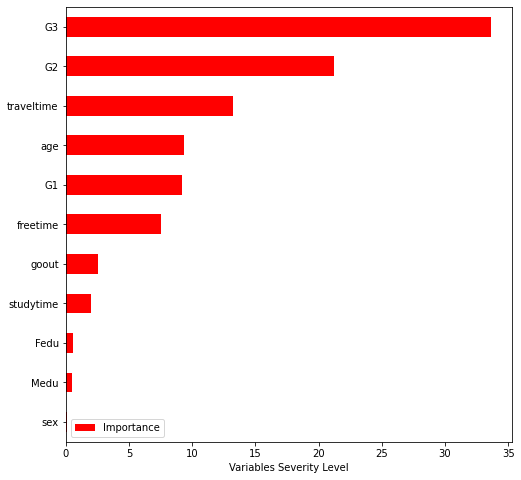

In [70]:
Importance=pd.DataFrame({"Importance":rf_tuned.feature_importances_*100},index=x_train.columns)
Importance.sort_values(by="Importance",
                       axis=0,
                       ascending=True).plot(kind="barh",color="r",figsize=(8,8))
plt.xlabel("Variables Severity Level")

## Comparision of Models with respect to Accuracies

In [71]:
models=[knn_tuned,nb_model,svc_tuned,rf_tuned]
names=["KNN","GaussianNB","SVC","RandomForestClassifier"]
i=0
for model in models:
    name=names[i]
    y_pred=model.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    print("-"*28)
    print(name+":")
    print("Accuracy: {:.4%}".format(acc))
    i=i+1

----------------------------
KNN:
Accuracy: 80.5825%
----------------------------
GaussianNB:
Accuracy: 77.3463%
----------------------------
SVC:
Accuracy: 78.3172%
----------------------------
RandomForestClassifier:
Accuracy: 86.0841%


Text(0.5, 1.0, 'Models Accuracy Rates')

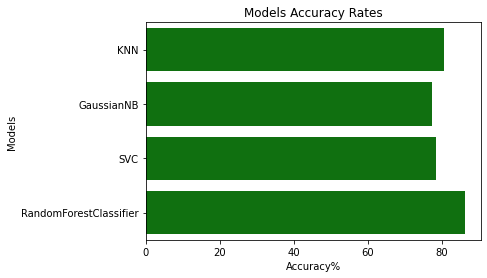

In [72]:
conclusion =[]
results=pd.DataFrame(columns=["Models","Accuracy"])
i=0
for model in models:
    name=names[i]
    y_pred=model.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    conclusion=pd.DataFrame([[name,acc*100]],columns=["Models","Accuracy"])
    results=results.append(conclusion)
    i=i+1

sns.barplot(x='Accuracy',y='Models',data=results,color="g")
plt.xlabel('Accuracy%')
plt.title('Models Accuracy Rates')

In [73]:
import pickle
pickle.dump(rf_tuned, open('model.pickle','wb'))

In [76]:
datafile.columns

Index(['sex', 'age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'freetime',
       'goout', 'G1', 'G2', 'G3', 'letter_grade'],
      dtype='object')

In [75]:
import json
columns={
    'data_columns' : [col.lower() for col in datafile.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))